# ICS5111 - Mining and Visualising Large Scale Data

##  Requirements and Remarks
This ipynb utilizes a range of embedded IFrames which are read locally, and therefore **should be run on Firefox** for optimum quality.
Raw HTML/CSS/JS code was not included in this ipynb, however the reader can just as easily follow each respective html file path which is linked to this document, for any code evaluation.

##  Yelp Data Set Challenge - 2017

User feedback and recommendation is potentially the most common and important ingredient to business success. For many 
businesses, the aim to ensure that the respective enterprise is thriving and doing well, boils down to many criteria, the 
most prevalent consisting of adopting a client first approach mentality to ensure good quality of service towards the customer. 
It is therefore no surprise that the longevity of a business is promoted by the number of customers retained, and the attraction
of new clients. It is therefore, the mission of the respective business enterprise to ensure the satisfaction of their 
clientele. A content client base promotes successful recommendation through different channels (word of mouth, social media, 
business review platforms), ensuring a solid reputation to the business, which in turn serves to retain the current customer 
base, or rope in new clients altogether. With the advance of telecommunication, social media and online business rating 
platforms, the majority of businesses have observed the need to achieve good rankings on such technological platforms to promote business 
success. With thousands of users discussing, reviewing their experiences, rating their satisfaction levels online, and making 
decisions based on other user reviews and recommendations, it is of no surprise that maintaining an active and positive 
influence on these online business rating platforms is detrimental to business longevity.

We believe that user reviews and comments are an extension of the user itself, and are key to understand the motives and thought
process of the client. Therefore, it is the aim of this case study to attempt to extract useful information regarding any user 
comments left on the Yelp recommendation system. Such information is useful when examined from varied angles, that is the examination and evaluation of user comments when examined independently or otherwise together as a bulk. More of this will be covered further on.

## Introducing the dataset

We first detail and describe the Yelp dataset, to establish a common understanding of it's inner structure. To facilitate access to the underlying data, we adopted the usage of a MySQL database, from which we extract our data and feed into respective python processes for further data processing. Therefore throughout this case study, it will be common to see SQL queries responsible for extracting the data, followed by potential pythonic scripts which carry out further work on the extracted data.

The Yelp dataset is composed of the following tables, in which we devote special attention to the highlited ones:
 - attribute (1,229,805 rows)
 - **business** (156,639 rows)
 - **category** (590,290 rows)
 - checkin (3,738,750 rows)
 - elite_years (180,563 rows)
 - friend (39,846,890 rows)
 - **hours** (734,421 rows)
 - **photo** (196,278 rows)
 - **review** (4,736,897 rows)
 - **tip** (1,028,802 rows)
 - **user** (1,183,362 rows)
 
NB: Further tables relevant to the case study were created during the experiment, as denoted below. Their exact nature and purpose will be detailed once introduced during the case study.

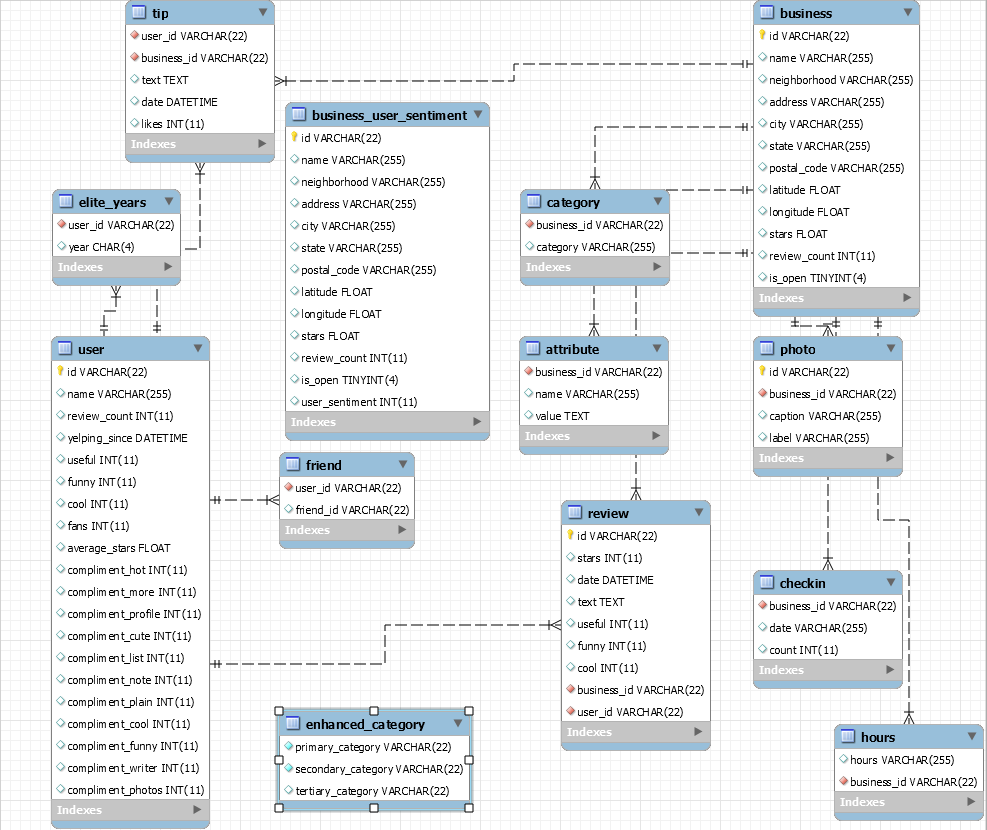

In [1]:
# Figure 1 - EER diagram of enhanced Yelp dataset (Yelp dataset + added tables for experiment purposes)
from IPython.display import Image
Image(filename="dependables/Yelp_Schema_Description/Schema EER Diagram.png")

### Dataset Formal Notation - Business Table

 - id: Yelp denoted business ID, used as table primary key.
 - name: Business attributed name.
 - neighborhood: Business registered neighborhood area.
 - address: Business registered address.
 - city: Business registered city.
 - state: Business registered state.
 - postal_code: Business registered postal code.
 - latitude: Business latitude coordinate.
 - longitude: Business longitude coordinate.
 - stars: Business attributed star rating.
 - review_count: Total sum of attrbited user reviews tied to the business.
 - is_open: 1 for business open, 0 for business closed.

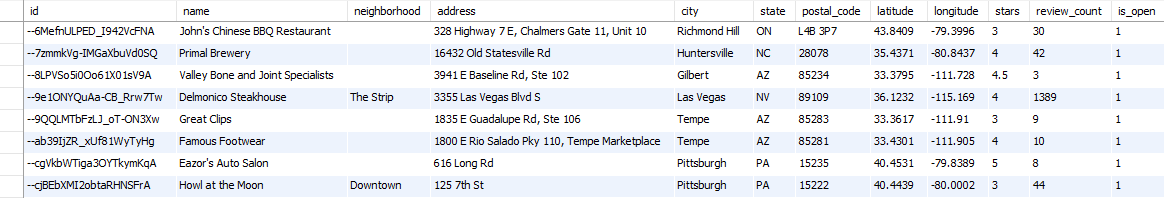

In [2]:
# Figure 2 - Screenshot of business table
Image(filename="dependables/Yelp_Table_Description/business_table.png")

### Dataset Formal Notation - Category Table

 - business_id: Yelp denoted business_id, used to relate to business table. Used as table primary key
 - category: Descriptive string of category type.

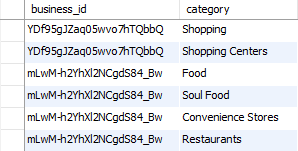

In [3]:
# Figure 3 - Screenshot of category table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/category_table.png")

### Dataset Formal Notation - Hours Table

 - hours: Time open on a particular day.
 - business_id: Business id used to link to business table. Used as table primary key.

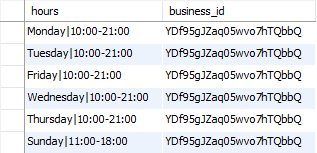

In [4]:
# Figure 4 - Screenshot of hours table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/hours_table.png")

### Dataset Formal Notation - Photo Table 

 - id: Yelp denoted photo id, used as table primary key.
 - business_id: Business id, used to link to business table.
 - caption: Related text caption to user captured photo.
 - label: Attributed photo tag.

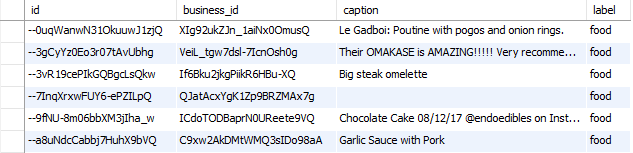

In [5]:
# Figure 5 - Screenshot of photo table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/photo_table.png")

### Dataset Formal Notation - Review Table

 - id: Yelp denoted review id, used as table primary key.
 - stars: Attributed star rating to user comment.
 - date: Date of review submission.
 - text: User text comment. Can be multi lingual.
 - useful: User ranking, whether comment was found useful.
 - funny: User ranking, whether comment was found funny.
 - cool: User ranking, whether comment was found cool.
 - business_id: Business id, used to link to business table.
 - user_id: User id, used to link to user table.

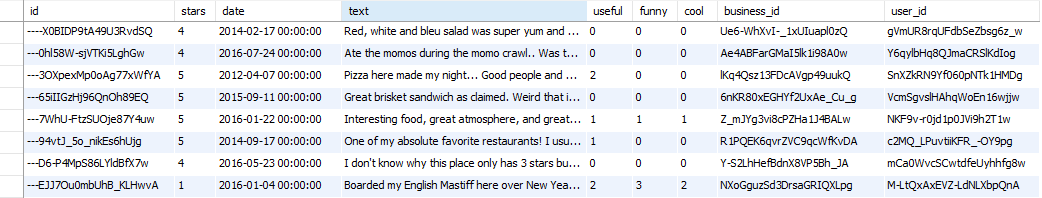

In [6]:
# Figure 6 - Screenshot of review table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/review_table.png")

### Dataset Formal Notation - Tip Table

 - user_id: User id, used to link to user table.
 - business_id: Business id, used to link to business table.
 - text: User text comment. Can be multi lingual.
 - date: Date of tip submission.
 - likes: Number of attributed likes where likes >= 0

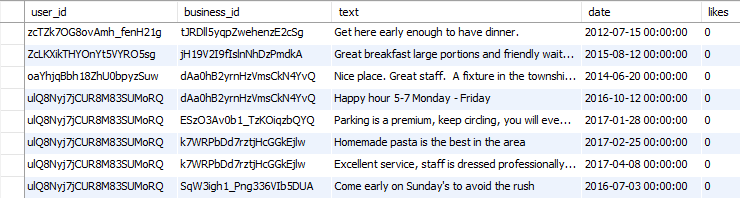

In [7]:
# Figure 7 - Screenshot of tip table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/tip_table.png")

### Dataset Formal Notation - User Table

 - id: Yelp denoted user id, used as table primary key.
 - name: User registered named.
 - review_count: Total number of reviews submitted by user.
 - yelping_since: Sign up date.
 - useful: Number of comments marked as 'useful'.
 - funny: Number of comments marked as 'funny'.
 - cool: Number of comments marked as 'cool'.
 - fans: Number of 'fans' (friends) linked with user.
 - average_stars: Average total reviews' star rating.
 - compliment_hot: Number of 'compliment_hot' compliments.
 - compliment_more: Number of 'compliment_more' compliments.
 - compliment_profile: Number of 'compliment_profile' compliments.
 - compliment_cute: Number of 'compliment_cute' compliments.
 - compliment_list: Number of 'compliment_list' compliments.
 - compliment_note: Number of 'compliment_note' compliments.
 - compliment_plain: Number of 'compliment_plain' compliments.
 - compliment_cool: Number of 'compliment_cool' compliments.
 - compliment_funny: Number of 'compliment_funny' compliments.
 - compliment_writer: Number of 'compliment_writer' compliments.
 - compliment_photos: Number of 'compliment_photos' compliments.

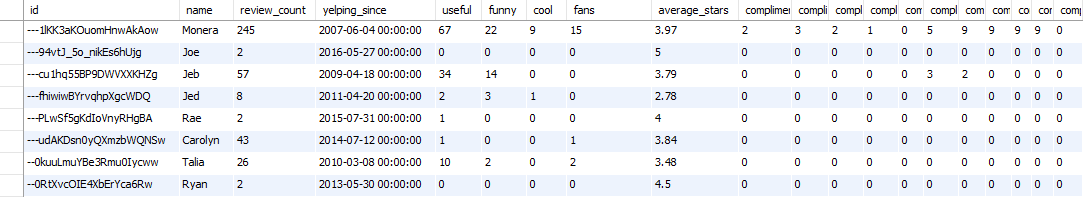

In [8]:
# Figure 8 - Screenshot of user table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/user_table.png")

## Dataset Visualization and Statistical Analysis

The following section is dedicated to data visual representations which were thought relevant to the current user comment data mining study. The following is section is split into 2 sub-sections:
 - Generic visualization overview of the Yelp dataset.
 - Specific visualizations and analysis performed with relation to users, businesses and respective user comments.

### Generic visualization overview of the Yelp dataset

``` sql
select  count(state), 
        state
from yelp_db.business 
group by state;
```

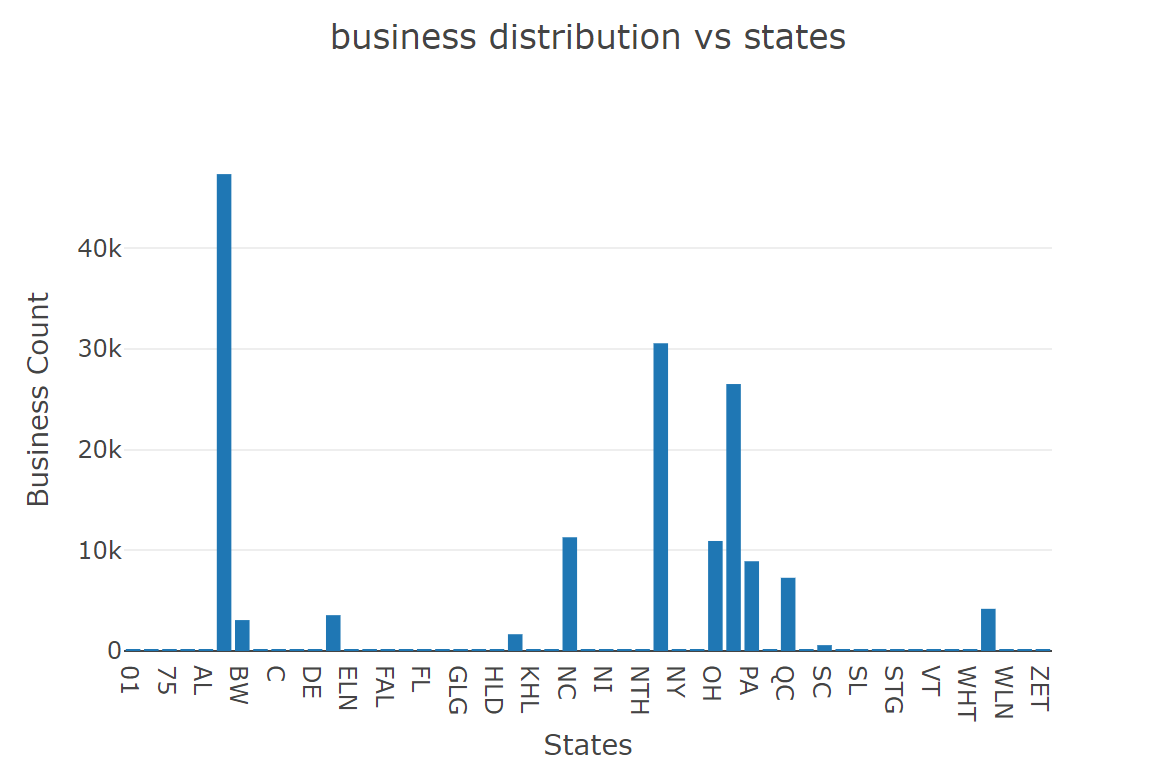

In [9]:
def display_business_distribution_over_states(db_obj):
    """" Displays a spread of businesses distributed per state """
    import plotly.graph_objs as go
    from plotly.offline import plot
    import src.constants.string_consts as c
    import src.constants.sql_consts as sql_c
    #
    # Open database connection
    conn = db_obj.connect()
    #
    sql = sql_c.sql_BUSINESS_DISTRIBUTION_OVER_STATES_2
    df = db_obj.select_query(conn, sql)
    #
    # Close database connection
    db_obj.close(conn)
    #
    states,state_count = [],[]
    [(state_count.append(row[0]), states.append(row[1])) for row in df]
    #
    data = Data([
        Bar(
            x=states,
            y=state_count
        )
    ])
    layout = go.Layout(
        title=c.BUSINESS_DISTRIBUTION_OVER_STATES,
        xaxis=dict(
            title='States'
        ),
        yaxis=dict(
            title='Business Count'
        )
    )
    config = {'scrollZoom': True,
              'linkText': "Visit plot.ly"}
    fig = go.Figure(data=data, layout=layout)
    plot(fig, config=config)
#
# Figure 9 - Business distribution over states considered by Yelp
Image(filename="dependables/Dataset Analysis/Yelp Generic/business distribution vs states.png")

``` sql
SELECT stars, 
       review_count 
from yelp_db.business 
where is_open = 1;
```

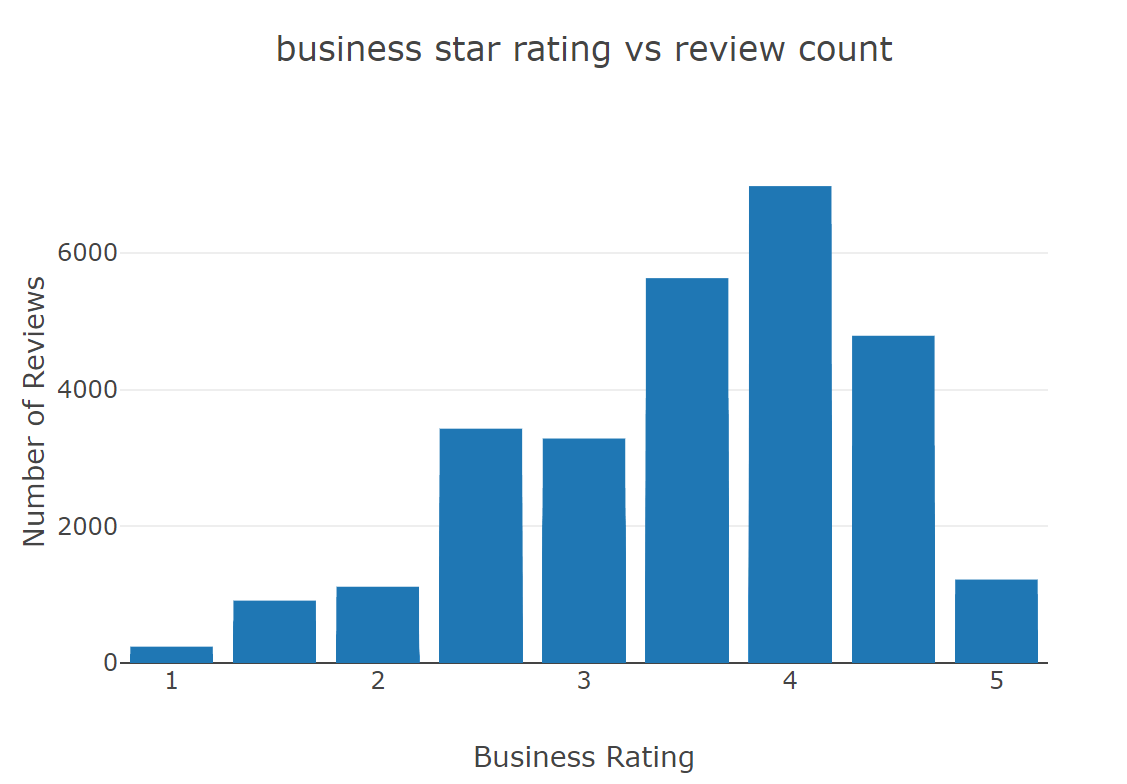

In [10]:
# Figure 10 - Total review count per business star ratings (1-5), for businesses which are considered open.
Image(filename="dependables/Dataset Analysis/Yelp Generic/business star rating vs review count.png")

``` sql
SELECT count(label) as cnt, 
       label 
FROM yelp_db.photo 
group by label;
```

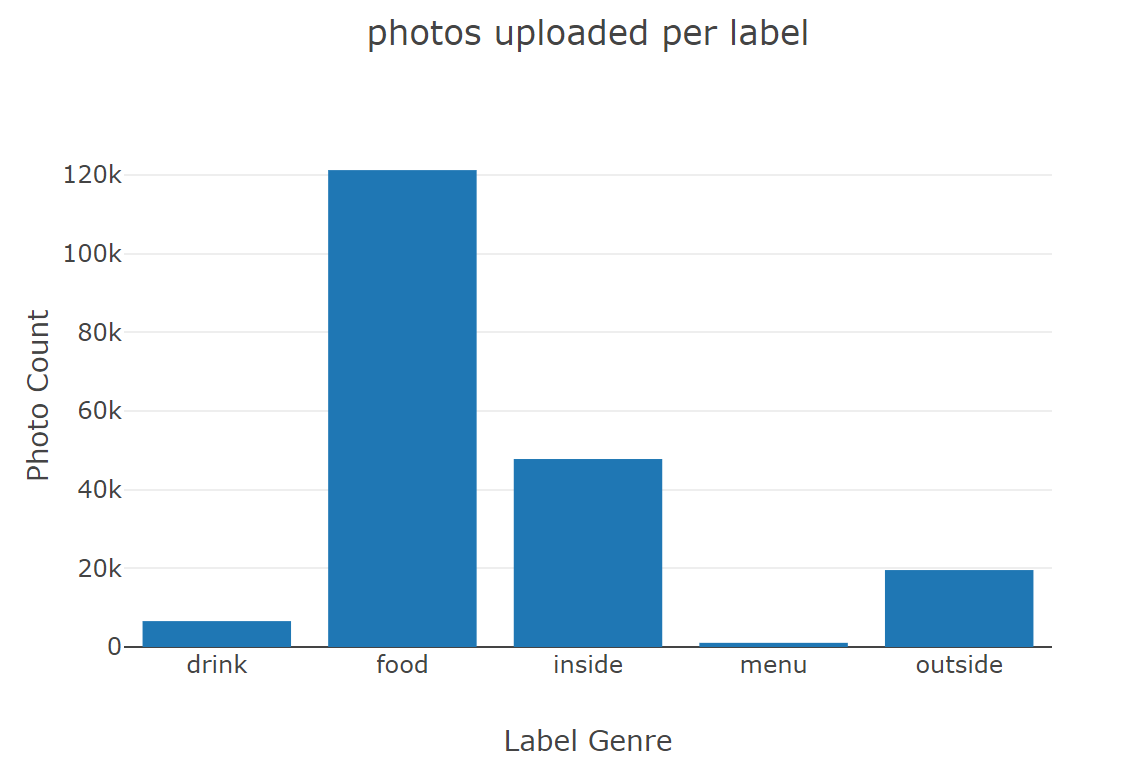

In [11]:
# Figure 11 - Total photo count per photo label tag
Image(filename="dependables/Dataset Analysis/Yelp Generic/photos uploaded per label.png")

``` sql
SELECT  count(e.user_id), 
        e.year 
from yelp_db.elite_years e 
group by e.year;
```

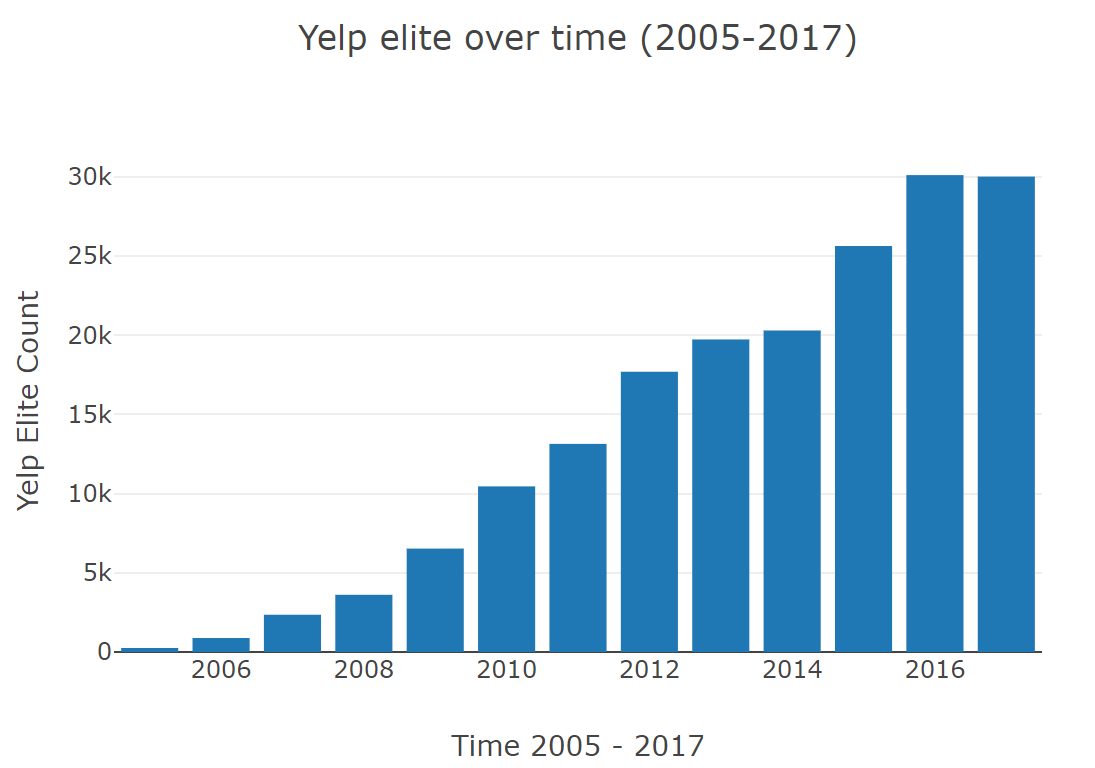

In [12]:
# Figure 12 - Total photo count per photo label tag
Image(filename="dependables/Dataset Analysis/Yelp Generic/yelp elite over time (2005-2017).png")

### Specific visualizations and analysis performed with related to users, businesses and comments

The aim of the following algorithm was to link to a neo4j graph database and create nodes for users (unless already present)
and establish relationships between nodes based on the links. The graph was visualised in the neo4j browser using cipher query:
**Match (m)-[r:FRIEND_OF]->() WITH m, COUNT(r) AS REL_CNT WHERE REL_CNT > 2 RETURN m;**

NB: Figure 13 was costly and time consuming to generate due to the large volume presentable to Neo4j. Later on this case study, we resort to using pure javascript graph representations for further relationship visualizations instead of building them in Neo4j due to customizability and time required to build graphs.

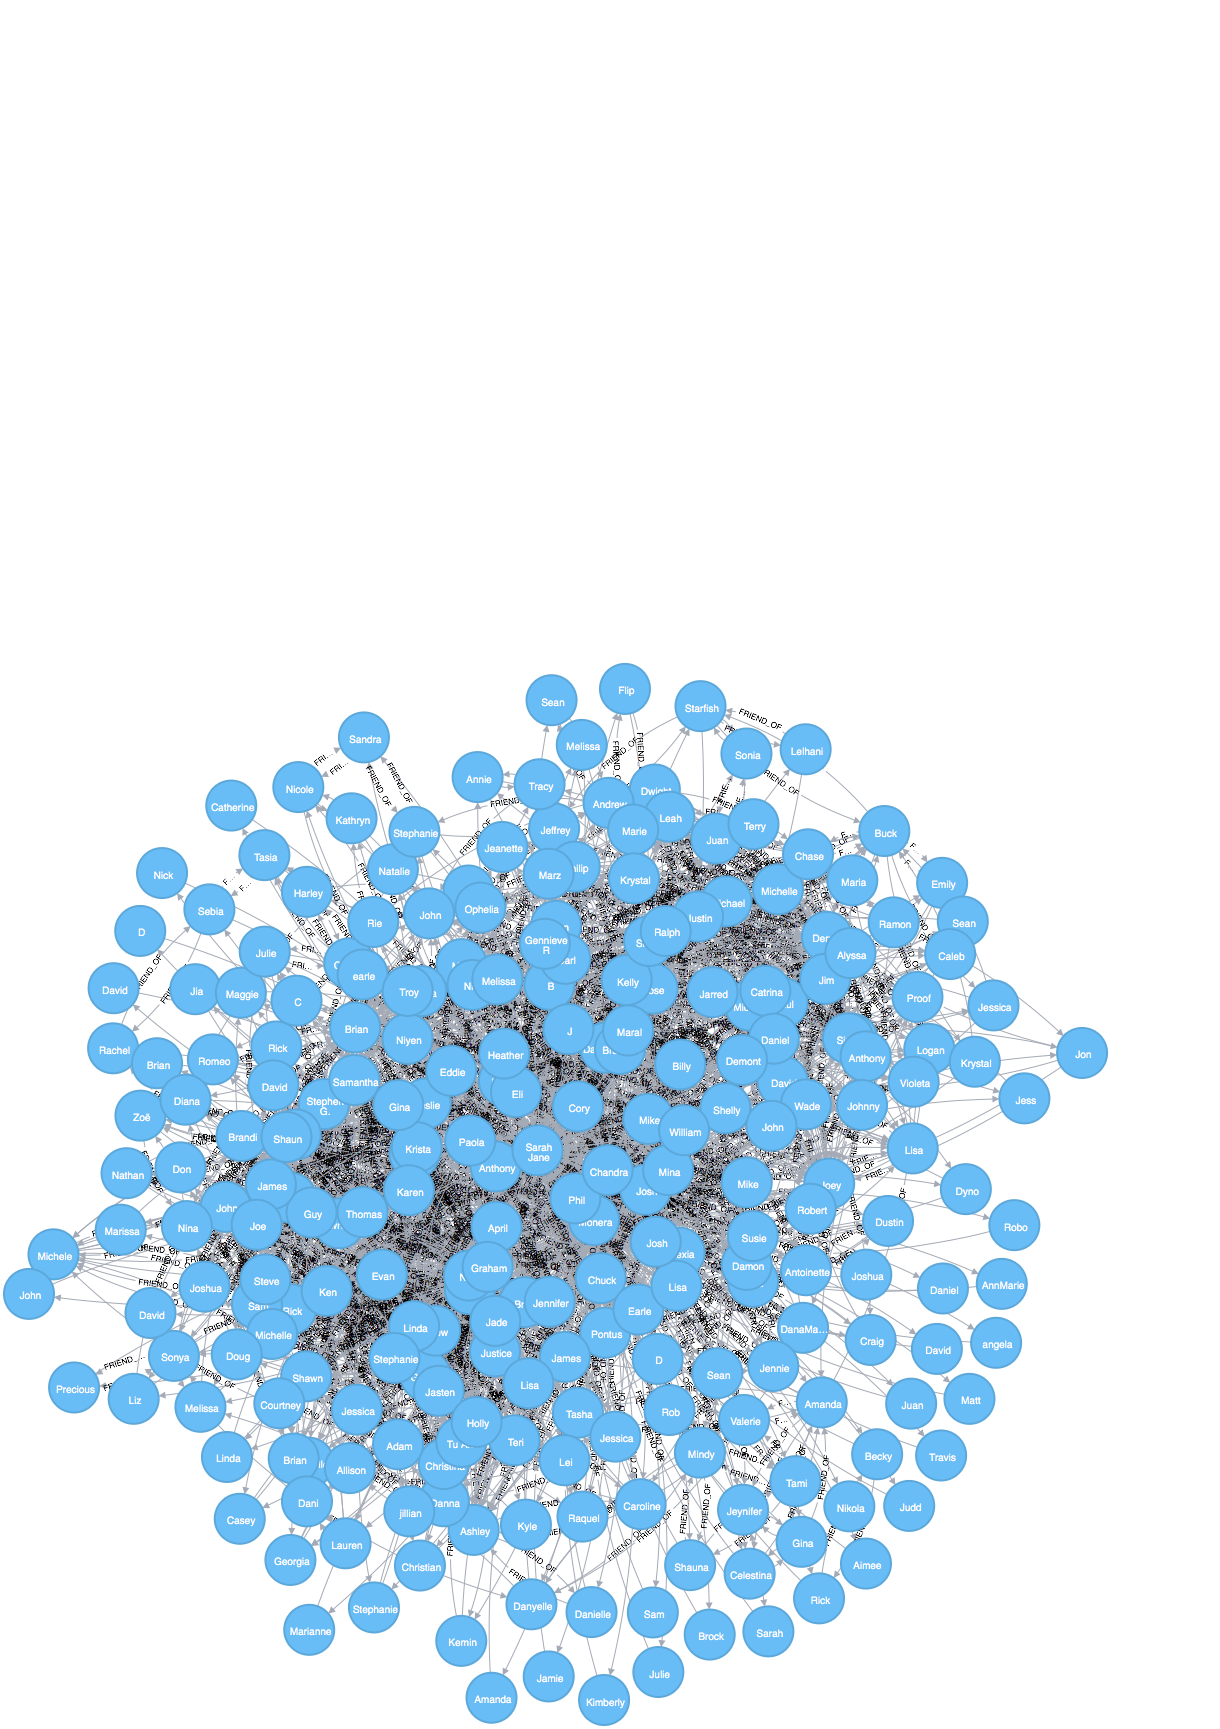

In [13]:
def Graph_Neo4J1_FRofFR():
    import pandas as pd
    import numpy as np
    from py2neo import Graph, Node, Relationship
    # read friendship data from friend.csv

    friendship = pd.read_csv('friend.csv', header=0, na_filter=False)

    friendship.shape[0]

    # open neo4j database connection to graph

    graph = Graph(user="neo4j", password="neo4j")
    graph = Graph("http://localhost:7474/db/data/")

    # create relationships as in each record in relationship

    a = graph.evaluate("MATCH (a:User) WHERE a.idno={x} RETURN a", x=friendship.user_id[1])

    i = 0

    for n, m in enumerate(friendship.T):

        x=friendship.user_id[m]

        if (x!=a['idno']):
            a = graph.evaluate("MATCH (a:User) WHERE a.idno={x} RETURN a", x=friendship.user_id[m]) # find node matching user id

        if (a is not None) :
            b = graph.evaluate("MATCH (b:User) WHERE b.idno={y} RETURN b", y=friendship.friend_id[m]) # find node matching friend id 
            if  (b is not None) :
                tx = graph.begin()
                ab = Relationship(a, "FRIEND_OF", b)
                tx.create(ab) # create relationship
                tx.commit()
#
# Figure 13 - Friend of Friend in Neo4j, based upon Yelp's friend table
Image(filename="dependables/Dataset Analysis/Yelp Specific/FRofFR.png")

In [14]:
import plotly
plotly.offline.init_notebook_mode()
from IPython.display import IFrame
# Figure 14 - Average text length vs attributed star rating
IFrame(src='dependables/Dataset Analysis/Yelp Specific/Average_review_length_per_star_rating.html', height=1000, width=1000)

``` sql
--
-- Retrieve review distribution by category
select count(r.id) as review_counts,
       c.category
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
join yelp_db.category c
on b.id = c.business_id
where 1=1
group by c.category;
--
-- Retrieve tip distribution by category
select count(*) as tip_counts,
       c.category
from yelp_db.tip t
join yelp_db.business b
on t.business_id = b.id
join yelp_db.category c
on b.id = c.business_id
where 1=1
group by c.category;
--
-- Retrieve photo caption distribution by category
select count(*) as category_counts,
       c.category
from yelp_db.photo p
join yelp_db.business b
on p.business_id = b.id
join yelp_db.category c
on b.id = c.business_id
where 1=1
group by c.category;
```

In [15]:
# Figure 15 - Comment count per category
IFrame(src='dependables/Dataset Analysis/Yelp Specific/Comment distribution by category.html', height=1000, width=1000)

At this stage, the decision to further split the current Yelp provided categories was taken. The category table was divided into 3 hierarchy subsets, based of official Yelp terminology subsets [http://www.localvisibilitysystem.com/docs/yelp-business-categories-list.pdf] :

 - Primary category
 - Secondary category
 - Tertiary category
 
This 'enhanced_category' table was added to the yelp_db schema, for future use, structured with the above column terminology.

``` sql
CREATE TABLE `enhanced_category` (
  `primary_category` varchar(22) NOT NULL,
  `secondary_category` varchar(22) NOT NULL,
  `tertiary_category` varchar(22)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;
--
LOAD DATA LOCAL INFILE 'D:/Projects/ICS5111_Practical_Assignment/data/yelp-business-categories-list.csv'
INTO TABLE enhanced_category
FIELDS TERMINATED BY ',' ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;
commit;
```

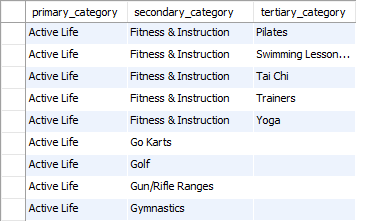

In [16]:
# Figure 16 - enhanced_category snippet
Image(filename="dependables/Yelp_Table_Description/enhanced_category_table.png")

``` sql
--
-- N of primary_category
SELECT count(*),
       primary_category
FROM yelp_db.enhanced_category
group by primary_category;
```

In [17]:
# Figure 17 - Range of primary categories
IFrame(src='dependables/Dataset Analysis/Yelp Specific/N_of_primary_categories.html', height=1000, width=1000)

--
-- N of secondary_category
SELECT count(*),
       secondary_category
FROM yelp_db.enhanced_category
group by secondary_category;

In [18]:
# Figure 18 - Range of secondary categories
IFrame(src='dependables/Dataset Analysis/Yelp Specific/N_of_secondary_categories.html', height=1000, width=1000)

``` sql
--
-- N on reviews distribution per business states
select count(*),
       b.state
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
group by b.state;
--
-- N on tips distribution per state
select count(*),
       b.state
from yelp_db.tip t
join yelp_db.business b
on t.business_id = b.id
group by b.state;
--
-- N on photo caption distribution per state
select count(*),
       b.state
from yelp_db.photo p
join yelp_db.business b
on p.business_id = b.id
group by b.state;
```

In [19]:
# Figure 19 - User comments (reviews/tips/photo captions) per state
IFrame(src='dependables/Dataset Analysis/Yelp Specific/N_of_user_comments_distribution_per_business_states.html', height=1000, width=1000)

``` sql
--
-- Review counts distribution per day over time
select count(*) as rev_count,
       date
from yelp_db.review
group by date
order by date;
--
-- User tips per day
select count(*) as tips,
       date
from yelp_db.tip
group by date
order by date;
--
-- User yelping_since signups per day
select count(*) as user_signup,
       yelping_since
from yelp_db.user
group by yelping_since
order by yelping_since;
```

In [20]:
# Figure 20 - User comments over time [2005 - 2017]
IFrame(src='dependables/Dataset Analysis/Yelp Specific/user_comments_over_time.html', height=1000, width=1000)

The following representation uses a business distribution over Yelp cities in google maps to show the business density clustered in all cities in the yelp dataset. Figure 20 and 21 are particularly useful since they enable us to realize that businesses are not solely restricted to the USA, as can be seen below. We can also establish that the dataset consists of notable outliers, especially from the heatmap due to inconsistent business placing (those located in the Pacific/Atlantic ocean)

Info window provides details for the particular city
- geolocation (latlong)
- avg_stars
- min_stars
- max_stars
- total number of reviews

JSON file format as follows:
{0{business_cnt1, lat36.09960174560547, lng-115.30699920654297, city 110 Las Vegas, avg_stars5, min_stars5, max_stars5, review_cnt47} ,

In [21]:
# Figure 21 - Business distribution over Yelp cities
IFrame(src='dependables/Visualizations/Business_hex_map/hexmap.html', height=1000, width=1000)

This representation uses a bubble chart over google maps to show the business density in all cities in the yelp dataset. 
Size of bubble represents business counts for the city

Info window provides details for the particular city
- geolocation (latlong)
- avg_stars
- min_stars
- max_stars
- total number of reviews

Notes: It is to be noted that smaller bubbles may indicate redundant city names  spelling mistakes 

JSON file format as follows:
{0{business_cnt1, lat36.09960174560547, lng-115.30699920654297, city 110 Las Vegas, avg_stars5, min_stars5, max_stars5, review_cnt47} ,

``` sql
select concat(
        '{"business_cnt":',count(*),', ',
        '"lat":',avg(latitude), ', ',
        '"lng":',avg(longitude), ', ' ,
        '"city": "',city, '", ',
        '"avg_stars":',avg(stars), ', ' ,
        '"min_stars":',min(stars),', ' ,
        '"max_stars":',max(stars),', ' ,
        '"review_cnt":',sum(review_count), '} '
        )
from yelp_db.business
where 1=1
and city is not null
and city <> ''
group by city;
```

In [22]:
# Figure 22 - Business distribution over Yelp cities (Heat Map)
IFrame(src='dependables/Visualizations/Business_heatmap/Business_Heatmap.html', height=1000, width=1000)

``` sql
--
-- Review metrics types
select sum(useful) as total_useful,
       max(useful) as max_useful,
       min(useful) as min_useful,
       sum(funny) as total_funny,
       max(funny) as max_funny,
       min(funny) as min_funny,
       sum(cool) as total_cool,
       max(cool) as max_cool,
       min(cool) as min_cool,
       avg(stars) as avg_stars,
       max(stars) as max_stars,
       min(stars) as min_stars,
       avg(length(text)) as avg_text,
       max(length(text)) as max_text,
       min(length(text)) as min_text
from yelp_db.review;
```

In [23]:
import pandas as pd
df = pd.read_csv('dependables/Dataset Analysis/Yelp Specific/data_extracts/Review metrics types.csv')
print(df)

   total_useful  max_useful  min_useful  total_funny  max_funny  min_funny  \
0       4681438        1125           0      1908577        631          0   

   total_cool  max_cool  min_cool  avg_stars  max_stars  min_stars  avg_text  \
0     2414207       513         0      3.724          5          1  620.3151   

   max_text  min_text  
0      9321         1  


## User Comments
It is evident, that user comments are quite relavent through the Yelp dataset. We attempt tp evaluat user comments on an individual case by case basis, or together to glean further insight with respect to businesses and users. Yelp distinguishes and breaks down the generic 'comment' as one of the following:

 - **User Review** A user message attributed to a particular business regarding past experiences.
 - **User Tip** A user message attributed to a particular business, usually in the form of a short sentence suggestion.
 - **User Photo Caption** A user message attributed to a photo, taken with respect to a particular business.
 
Such comments allow us to gain insight on different fronts, including but not limited to the quality of service at a particular business, as well as the overall sentimentality of a particular user. More of this will be explained in the following sections.

### User Experience and Sentimentality
Given the varied range of user comments (reviews, texts, tips), it would be beneficial and interesting to extract the overall sentimentality of a particular user comment. This is useful since it tells us the overall sentimentatlity of a particular user with respect to a particular business, to be able to glean what type of experience the user has experienced when relating to a business. We pursue this further by attempting to apply sentiment analysis on user comments, to establish and categorize user texts under three possible outcomes:

 - Positive Sentiment (The user has established positive feelings towards a particular business)
 - Neutral Sentiment (The user has established no particular bias in sentiment towards a particular business)
 - Negative Sentiment (The user has established negative feelings towards a particular business)
 
This categorization allows us to attribute user experience to a particular business, to allow us to be able to label businesses using different sentiment categorizations.

### Sentiment Analysis
To gauge and categorize user comments, a sentiment analysis classifier was built and evaluated using the following python libraries:
 - scikit learn
 - NLTK
 
The sentiment analyzer was trained and validated upon external data, using the below mentioned datasets. However, it is worth mentioning that several other datasets were considered and tested for the training of the Sentiment Analysis classifier, including a tweet corpus based of Tweeter tweets, and using reviews from the Yelp dataset itself. These were dropped in favour of a better data training sample which managed to achieve a higher measure of positive classified results.

 - Positive Sentiment Corpus (34052 instances) - [https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/blob/master/data/opinion-lexicon-English/positive-words.txt]
 - Neutral Sentiment Corpus (3421 instances) - [https://www3.nd.edu/~mcdonald/Word_Lists.html]
 - Negative Sentiment Corpus (26860 instances) - [https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/blob/master/data/opinion-lexicon-English/negative-words.txt]
 
### Methodology Used
The Sentiment Analyzer is composed of a number of steps. Once the classifier is trained using a Logistic Regression classifier, data (user comments) can be fed into the machine learning model. A text-preprocessing module ensures that input data is formalized, and cleaned before input into the machine learning model. The techniques used to preprocess the data include:
 - Numerics Removal
 - Input lowercase
 - Remove escape characters
 - First sentence emphasizer
 - Sentence tokenization
 - Stop word removal
 - Sentence POS tagging. Nouns, Cardinal Digits, Interjections are removed
 - Word lemmatization
 - N-Gram splitting (Trigrams were found to be most optimum)
 
The 'First sentence emphasizer' step mentioned above is a hand crafted preprocessing step designed to put heavy emphasis on the first sentence of the respective user comment. The primary motive behind this 'extra' step was to take advantage of the fact that most user comments state their mind and overall sentence sentiment in the first sentence of the comment, such as:
 - **Eh. Unimpressed.** Poor waitresses look overworked- we had to ask the manager for refills, got my order wrong twice...
 - **Pizza here made my night...*** Good people and great pizza. They can do anything you ask with a great attitude!...
 - **Super good food!** My friends and I ordered 2 lbs of shrimp, 2 lbs of crab legs, 2 Cajun fri...
 - **I waited for my order for over 10 minutes.** I ordered two chicken finger kids meals and two adult meals...
This allows the classifier to put more importance on the first sentence, under the assumption that the majority of the Yelp dataset comments follow this notation. The downside of such an approach is the lack of accuracy over sentences starting with a hint of sarcasm. However, this decrease in accuracy with relation to sarcasm detection was negligible when compared to the overall gain for sentiment classfication.

### Implementation
Different sentiment classification models were tried and evaluated over a subsample of 400 reviews. Three distinct classification models were used:
 - Scikit Naive Bayes Classification
 - NLTK Vader Sentiment Suite
 - Scikit Logistic Regression Classification
 
Both the Naive Bayes and Logistic Regression implementations utilize a TF-IDF weighting approach for usage by the respective classification model.

In [24]:
class WordCorpus():
    #
    def __init__(self):
        """ Data loading module, responisble for loading data into the system, as well as formatting
            the data into the required vocab format """
        self.__training_positive_corpus = pd.read_csv('../data/Active Data/Train/Positive_Corpus.csv', header=None,
                                                      encoding = "ISO-8859-1")
        self.__training_negative_corpus = pd.read_csv('../data/Active Data/Train/Negative_Corpus.csv', header=None,
                                                      encoding = "ISO-8859-1")
        self.__training_neutral_corpus = pd.read_csv('../data/Active Data/Train/Neutral_corpus.csv', header=None,
                                                     encoding = "ISO-8859-1")
        self.__testing_corpus = pd.read_csv('../data/Active Data/Test/Test_Corpus.csv')
    #
    def __get_positive_corpus(self):
        return self.__training_positive_corpus
    #
    def __get_negative_corpus(self):
        return self.__training_negative_corpus
    #
    def __get_neutral_corpus(self):
        return self.__training_neutral_corpus
    #
    def get_test_corpus(self):
        text, classifications = self.__testing_corpus['text'], self.__testing_corpus['classification']
        return text, classifications
    #
    def get_vocab(self):
        """ Our vocab corpus, returns 3 lists (positive,negative,neutral)
            This will need to be replaced with the actual nltk/equivalent word corpus """
        positive_vocab = tuple(self.__get_positive_corpus()[0])
        negative_vocab = tuple(self.__get_negative_corpus()[0])
        neutral_vocab = tuple(self.__get_neutral_corpus()[0])
        return positive_vocab, negative_vocab, neutral_vocab

In [25]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#
class TextCleanup():
    #
    def __init__(self):
        """ Used as a pre-processing module, through which user comments are pre-processed before being passed 
            to the machine learning model"""
        pass
    #
    def clean_sentence(self,sentence):
        """ Takes input sentence, and formats it in a presentable state for the classifier """
        #
        # Remove numerics
        sentence = re.sub(r'\d+', '', sentence)
        #
        # Convert to lowercase
        sentence = sentence.lower()
        #
        # Removes trailing /r, /n, /t
        sentence = sentence.replace("\n","").replace("\r","").replace("\t","").replace("\\","").replace("/","")
        #
        # Puts emphasis on first sentence in review
        sentence = str(self._get_first_sentence(sentence,8)) + ' ' + sentence
        #
        # Tokenize (split into unigrams) for sentence cleanup
        sentence = self.__word_grams(sentence,1)
        #
        # Replace negations with antonyms
        #sentence = self.replace_negations(sentence)
        #
        # Remove stop words
        filtered_words = [word for word in sentence if word not in stopwords.words('english')]
        #
        # Sentence Tagging & Removal
        tagged_sentence = pos_tag(filtered_words)
        stripped_tags = ['NN','NNS','NNP','NNPS','CD','UH'] # https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/
        filtered_words = [word for word,type in tagged_sentence if type not in stripped_tags]
        #
        # Perform Stemming
        #stemmer = PorterStemmer()
        #stemmer = SnowballStemmer('english')
        #filtered_words = [(stemmer.stem(word)) for word in filtered_words]
        #
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        filtered_words = [(lemmatizer.lemmatize(word)) for word in filtered_words]
        #
        # Split into n-grams
        filtered_words = self.__word_grams(" ".join(filtered_words), 3)
        #print(filtered_words)
        #print(tagged_sentence)
        return filtered_words
    #
    def _get_first_sentence(self, sentence, n=0):
        """ Multiplies the first sentence by n times to put more emphasis on the first sentence """
        punctuation_list = ['.','!',':']
        split_sentence = sentence.split(' ')
        exit_flag = False
        #
        # Checks for sentences without punctuation
        for punctuation in punctuation_list:
            if punctuation in sentence:
                exit_flag = True
                break
        #
        if exit_flag is False:
            return " ".join(split_sentence[:10])
        #
        for i in range(len(split_sentence)):
            for punctuation in punctuation_list:
                if punctuation in split_sentence[i]:
                    first_sentence = ""
                    for j in range(n):
                        first_sentence += " ".join(split_sentence[:i+1])
                    return first_sentence

    #
    def __word_grams(self, sentence, N=1):
        s = []
        tokenizer = RegexpTokenizer(r'\w+')
        sentence = tokenizer.tokenize(sentence)
        for ngram in ngrams(sentence, N):
            s.append(' '.join(str(i) for i in ngram))
        return s
    #
    def replace(self, word, pos=None):
        antonyms = set()
        for syn in wordnet.synsets(word, pos=pos):
            for lemma in syn.lemmas():
                for antonym in lemma.antonyms():
                    antonyms.add(antonym.name())
        if len(antonyms) == 1:
            return antonyms.pop()
        else:
            return None
    #
    def replace_negations(self, sentence):
        i, l = 0, len(sentence)
        words = []
        while i < l:
            word = sentence[i]
            if word == 'not' and i+1 < l:
                ant = self.replace(sentence[i+1])
                if ant:
                    words.append(ant)
                    i+=2
                    continue
            words.append(word)
            i += 1
        return ' '.join(words)
    #

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#
class Scoring_Functions():
    #
    def __init__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
    #
    def accuracy(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
        return str(accuracy_score(self.y_true, self.y_pred) * 100) + "%"
    #
    def precision(self):
        # http: // scikit - learn.org / stable / modules / generated / sklearn.metrics.precision_score.html  # sklearn.metrics.precision_score
        return str(precision_score(self.y_true, self.y_pred, average='weighted')* 100) + '%'
    #
    def recall(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
        return str(recall_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'
    #
    def f_measure(self):
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
        return str(f1_score(self.y_true, self.y_pred, average='weighted') * 100) + '%'

### Naive Bayes Classification

In [27]:
from nltk.classify import NaiveBayesClassifier
from nltk import precision
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
#
class SentimentAnalyzer():
    #
    """
    Example:

    from src.textprocessing.SentimentAnalyzer import SentimentAnalyzer
    sa = SentimentAnalyzer()
    pred = sa.predict("I will never go there again")
    print(pred)
    """
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.__word_corpus = WordCorpus()
        X, y = self.__format_vocab()
        self.__NBclassifier = self.__train_classifier(X, y)
        self.text_cleanup = TextCleanup()
    #
    def __format_vocab(self):
        """ Returns an entire set of vocab which is marked as either 1) Positive, 2) Negative, 3) Neutral for NLTK
        classification """
        positive_vocab, negative_vocab, neutral_vocab = self.__word_corpus.get_vocab()
        pos_list, neu_list, neg_list = [],[],[]
        #
        [(pos_list.append('pos')) for i in range(len(positive_vocab))]
        [(neu_list.append('neu')) for i in range(len(neutral_vocab))]
        [(neg_list.append('neg')) for i in range(len(negative_vocab))]
        #
        return positive_vocab + negative_vocab + neutral_vocab, pos_list + neu_list + neg_list
    #
    def __train_classifier(self, X, y=None):
        """ Takes the training vocab (consisting of pos,neg,neu) vocab and trains itself """
        #
        # Scikit Naive Bayes Multinomial classifier.
        X = self.vectorizer.fit_transform(X)
        print(self.vectorizer)
        classifier = MultinomialNB().fit(X,y)
        print(classifier)
        return classifier
    #
    def __classify(self, word):
        """ Takes input sample and classifies it as either pos / neu / neg """
        #
        # Scikit Naive Bayes Multinomial classifier.
        word = self.vectorizer.transform([word])
        return self.__NBclassifier.predict(word)
    #
    def predict(self,sentence):
        """ Public function. Takes a sentence as parameter and assigns a sentiment label to it (pos/neg/neu) """
        pos,neg,neu = 0,0,0
        neutral_weight = 0  # We introduce a weight to positive and negative scalar counts, to classify as neutral in the case of close pos-neg tie ins
        #
        filtered_words = self.text_cleanup.clean_sentence(sentence)
        #self.__NBclassifier.show_most_informative_features()
        for word in filtered_words:
            prediction = self.__classify(word)
            #print(str(word) + " - " + str(prediction))
            if prediction == "pos":
                pos += 1
            elif prediction == "neg":
                neg += 1
            elif prediction == "neu":
                neu += 1
        #
        if pos-neutral_weight > neg and pos-neutral_weight > neu:
            return "pos"
        elif neg-neutral_weight > pos and neg-neutral_weight > neu:
            return "neg"
        else:
            return "neu"
    #
    def test_set(self):
        """ Public function. Uses the classifier on the testing set of data to determine the accuracy """
        #
        y_pred, y_true = [], []
        test_sentences, y_true = self.__word_corpus.get_test_corpus()
        #
        [(y_pred.append(self.predict(sentence))) for sentence in test_sentences]
        #
        score_func = Scoring_Functions(y_pred, y_true)
        accuracy = score_func.accuracy()
        precision = score_func.precision()
        recall = score_func.recall()
        f_measure = score_func.f_measure()
        return "Accuracy: " + str(accuracy) + "\nPrecision: " + str(precision) + "\nRecall: " + str(recall) + "\nF_Measure: " + str(f_measure)


In [28]:
sa = SentimentAnalyzer()
#
sentence = 'Eh. Unimpressed. Poor waitresses look overworked- we had to ask the manager for refills, got my order wrong twice. Breakfast was a little bland (we got the healthy options & apparently that means no flavor) You have many other better and more delicious options nearby. Sorry morning squeeze, work more on your food and service instead of putting all your effort in a trendy vibe.'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Pizza here made my night... Good people and great pizza. They can do anything you ask with a great attitude!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Super good food! My friends and I ordered 2 lbs of shrimp, 2 lbs of crab legs, 2 Cajun fries, sweet potato fries, calamari, and fried catfish! We ate it allllll up. My only concern was that the crabs were a bit difficult to crack but then again I'm used to cracking the Alaskan crab legs. But other than the difficult cracking, the mix of all the seasonings was just a great fusion of flavors to really individualize their seafood from anything I've ever tried. And it was not primetime when we went so service was pretty fast! Hope they're on top of their game when it is busy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I waited for my order for over 10 minutes. I ordered two chicken finger kids meals and two adult meals. Had to pull forward and wait another ten minutes for food. When I got home they didn't give me my kids meals."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "This place is definitely for hipsters, which me and my boyfriend are not. It is well decorated and feels really 'cool' but the food wasn't anything to rave about. One of those places that people go to just to say they've been there, I guess. I went for dinner, and the dinner menu is actually smaller than their lunch menu? I thought that was weird. All the things that I saw on yelp reviews and I actually wanted to try were not for sale at the time I went. I settled and had curry, it was alright. So they get an okay review, because everything there was okay. Nothing bad, just nothing special. Oh I lied, there was one thing that was pretty great. We paid four bucks for their self-filtered water and it was actually really amazing. LOL. I know that sounds like I totally got ripped off but the water was literally tasteless it felt so weird to drink. Quite the experience. I wouldn't go back for water, but I am glad I tried it once!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I had the pork shank and ate the whole thing. Too bad for my waist line but excellent choice for my belly! it could have fed two and fell off the bone. Delicious."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Bad bad customer service!!  I was willing to give this place a try. Came in to make some purchases and was completely ignored. Employees were busy conversing among themselves. Waited for about 15minutes for them and was told "some one will be with you shortly" so i just walked out. Best if you take business to Healy or AZ guns!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "An absolute favourite of mine....I don't understand why this place isn't getting better reviews. I love love Thai food and Pi Toms does it better than any place I have ever been to, hands down. I usually order Pi Tom's own version of Pad Thai....they also have a 'Traditional' version too but I prefer the restaurants own and it is delicious. The ingredients for both dishes are practically the same but Pi Toms dish uses a lighter, more subtle sauce (not ketchup like most traditional pad thai dishes) leaving the flavours of the other ingredients to be fully appreciated. They give pretty decent portion sizes....I rarely finish the entire thing but makes for a great lunch the next day... The mango salad here is to die for! Really fresh ingredients makes this salad extra special and they use a delicious sweet dressing. There are many Pi Toms around Toronto but this one is my personal favourite...its on a nice, fairly quiet street just off Yonge and Wellesley , and has a cute patio complete with romantic lighting, perfect for a dinner date or a relaxing night with a friend. Great service, great place, even better food... what more can you ask for?.."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Not good. My masseuse applied zero pressure. Not worth spending your hard earned cash on."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "My expectations were low-I expected good, not great food, reasonably priced.  I made a point of asking for and ordering gluten free foods.  Well the lentil soup was virtually flavorless.  The nachos were nuked in a microwave, half the chips were the crumbs from the bottom of the bag, and the salsa was not spicy but tasted more like marinara.   the \"gluten free\" main course arrived with wheat rather than rice noodles.  I will never return."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
#
# Carry out an evaluation over a sub-sample of 400 reviews
print('Evaluation Metrics over Yelp Dataset subsample of 400 reviews')
print(sa.test_set())

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Eh. Unimpressed. Poor waitress... -> neg
Pizza here made my night... Go... -> neg
Super good food! My friends an... -> neg
I waited for my order for over... -> neg
This place is definitely for h... -> neg
Very unimpressed by their pad ... -> neg
I had the pork shank and ate t... -> pos
Bad bad customer service!!  I ... -> neg
Very disappointed! Got the all... -> neg
An absolute favourite of mine.... -> pos
Very unimpressed by their pad ... -> neg
Very disappointed! Got the all... -> neg
Not 

c:\python36\lib\site-packages\ipykernel_launcher.py:89: DeprecationWarning:

generator 'ngrams' raised StopIteration



Accuracy: 52.1410579345%
Precision: 65.6767032195%
Recall: 52.1410579345%
F_Measure: 52.5028307284%


### Vader Sentiment Analyzer

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#
# https://medium.com/@aneesha/quick-social-media-sentiment-analysis-with-vader-da44951e4116
class SentimentAnalyzer():
    #
    """ An example as to how invoke and use this class:
            from src.textprocessing.SentimentAnalyzer import SentimentAnalyzer
            sa = SentimentAnalyzer()
            pred = sa.predict("I will never go there again")
            print(pred)
    """
    def __init__(self):
        self.text_cleanup = TextCleanup()
        self.sid = SIA()
        self.__word_corpus = WordCorpus()
    #
    def predict(self,sentence):
        """ Public function. Takes a sentence as parameter and assigns a sentiment label to it (pos/neg/neu) """
        #
        # filtered_words = self.text_cleanup.clean_sentence(sentence)
        # polarity = self.sid.polarity_scores(' '.join(filtered_words))
        #
        polarity = self.sid.polarity_scores(sentence)
        sentiment = ""
        sentiment_score = -1
        for key, val in polarity.items():
            if val > sentiment_score and key != "compound":
                sentiment = key
                sentiment_score = val
        # print(sentence)
        # print(sentiment)
        # print('---------------------------')
        return sentiment
    #
    def test_set(self):
        """ Public function. Uses the classifier on the testing set of data to determine the accuracy """
        #
        y_pred, y_true = [], []
        test_sentences, y_true = self.__word_corpus.get_test_corpus()
        #
        [(y_pred.append(self.predict(sentence))) for sentence in test_sentences]
        #
        score_func = Scoring_Functions(y_pred, y_true)
        accuracy = score_func.accuracy()
        precision = score_func.precision()
        recall = score_func.recall()
        f_measure = score_func.f_measure()
        return "Accuracy: " + str(accuracy) + "\nPrecision: " + str(precision) + "\nRecall: " + str(recall) + "\nF_Measure: " + str(f_measure)

c:\python36\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [30]:
sa = SentimentAnalyzer()
#
sentence = 'Eh. Unimpressed. Poor waitresses look overworked- we had to ask the manager for refills, got my order wrong twice. Breakfast was a little bland (we got the healthy options & apparently that means no flavor) You have many other better and more delicious options nearby. Sorry morning squeeze, work more on your food and service instead of putting all your effort in a trendy vibe.'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Pizza here made my night... Good people and great pizza. They can do anything you ask with a great attitude!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Super good food! My friends and I ordered 2 lbs of shrimp, 2 lbs of crab legs, 2 Cajun fries, sweet potato fries, calamari, and fried catfish! We ate it allllll up. My only concern was that the crabs were a bit difficult to crack but then again I'm used to cracking the Alaskan crab legs. But other than the difficult cracking, the mix of all the seasonings was just a great fusion of flavors to really individualize their seafood from anything I've ever tried. And it was not primetime when we went so service was pretty fast! Hope they're on top of their game when it is busy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I waited for my order for over 10 minutes. I ordered two chicken finger kids meals and two adult meals. Had to pull forward and wait another ten minutes for food. When I got home they didn't give me my kids meals."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "This place is definitely for hipsters, which me and my boyfriend are not. It is well decorated and feels really 'cool' but the food wasn't anything to rave about. One of those places that people go to just to say they've been there, I guess. I went for dinner, and the dinner menu is actually smaller than their lunch menu? I thought that was weird. All the things that I saw on yelp reviews and I actually wanted to try were not for sale at the time I went. I settled and had curry, it was alright. So they get an okay review, because everything there was okay. Nothing bad, just nothing special. Oh I lied, there was one thing that was pretty great. We paid four bucks for their self-filtered water and it was actually really amazing. LOL. I know that sounds like I totally got ripped off but the water was literally tasteless it felt so weird to drink. Quite the experience. I wouldn't go back for water, but I am glad I tried it once!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I had the pork shank and ate the whole thing. Too bad for my waist line but excellent choice for my belly! it could have fed two and fell off the bone. Delicious."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Bad bad customer service!!  I was willing to give this place a try. Came in to make some purchases and was completely ignored. Employees were busy conversing among themselves. Waited for about 15minutes for them and was told "some one will be with you shortly" so i just walked out. Best if you take business to Healy or AZ guns!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "An absolute favourite of mine....I don't understand why this place isn't getting better reviews. I love love Thai food and Pi Toms does it better than any place I have ever been to, hands down. I usually order Pi Tom's own version of Pad Thai....they also have a 'Traditional' version too but I prefer the restaurants own and it is delicious. The ingredients for both dishes are practically the same but Pi Toms dish uses a lighter, more subtle sauce (not ketchup like most traditional pad thai dishes) leaving the flavours of the other ingredients to be fully appreciated. They give pretty decent portion sizes....I rarely finish the entire thing but makes for a great lunch the next day... The mango salad here is to die for! Really fresh ingredients makes this salad extra special and they use a delicious sweet dressing. There are many Pi Toms around Toronto but this one is my personal favourite...its on a nice, fairly quiet street just off Yonge and Wellesley , and has a cute patio complete with romantic lighting, perfect for a dinner date or a relaxing night with a friend. Great service, great place, even better food... what more can you ask for?.."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Not good. My masseuse applied zero pressure. Not worth spending your hard earned cash on."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "My expectations were low-I expected good, not great food, reasonably priced.  I made a point of asking for and ordering gluten free foods.  Well the lentil soup was virtually flavorless.  The nachos were nuked in a microwave, half the chips were the crumbs from the bottom of the bag, and the salsa was not spicy but tasted more like marinara.   the \"gluten free\" main course arrived with wheat rather than rice noodles.  I will never return."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
#
# Carry out an evaluation over a sub-sample of 400 reviews
print('Evaluation Metrics over Yelp Dataset subsample of 400 reviews')
print(sa.test_set())

Eh. Unimpressed. Poor waitress... -> neu
Pizza here made my night... Go... -> neu
Super good food! My friends an... -> neu
I waited for my order for over... -> neu
This place is definitely for h... -> neu
Very unimpressed by their pad ... -> neu
I had the pork shank and ate t... -> neu
Bad bad customer service!!  I ... -> neu
Very disappointed! Got the all... -> neu
An absolute favourite of mine.... -> neu
Very unimpressed by their pad ... -> neu
Very disappointed! Got the all... -> neu
Not good. My masseuse applied ... -> neu
My expectations were low-I exp... -> neu
Evaluation Metrics over Yelp Dataset subsample of 400 reviews
Accuracy: 13.6020151134%
Precision: 89.2405421614%
Recall: 13.6020151134%
F_Measure: 11.1791366139%


### Logistic Regression Classification

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
#
class SentimentAnalyzer():
    #
    """ An example as to how invoke and use this class:
            from src.textprocessing.SentimentAnalyzer import SentimentAnalyzer
            sa = SentimentAnalyzer()
            pred = sa.predict("I will never go there again")
            print(pred)
    """
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.__word_corpus = WordCorpus()
        X, y = self.__format_vocab()
        self.__LRclassifier = self.__train_classifier(X, y)
        self.text_cleanup = TextCleanup()
    #
    def __format_vocab(self):
        """ Returns an entire set of vocab which is marked as either 1) Positive, 2) Negative, 3) Neutral for NLTK
        classification """
        positive_vocab, negative_vocab, neutral_vocab = self.__word_corpus.get_vocab()
        pos_list, neu_list, neg_list = [],[],[]
        #
        [(pos_list.append('pos')) for i in range(len(positive_vocab))]
        [(neu_list.append('neu')) for i in range(len(neutral_vocab))]
        [(neg_list.append('neg')) for i in range(len(negative_vocab))]
        #
        return positive_vocab + negative_vocab + neutral_vocab, pos_list + neu_list + neg_list
    #
    def __train_classifier(self, X, y=None):
        """ Takes the training vocab (consisting of pos,neg,neu) vocab and trains itself """
        #
        # Logistic Regression Classifier
        X = self.vectorizer.fit_transform(X)
        #print(self.vectorizer)
        classifier = LogisticRegression().fit(X,y)
        #print(classifier)
        return classifier
    #
    def __classify(self, word):
        """ Takes input sample and classifies it as either pos / neu / neg """
        #
        # Logistic Regression Classifier
        word = self.vectorizer.transform([word])
        return self.__LRclassifier.predict(word)
    #
    def predict(self,sentence):
        """ Public function. Takes a sentence as parameter and assigns a sentiment label to it (pos/neg/neu) """
        pos,neg,neu = 0,0,0
        neutral_weight = 0 # We introduce a weight to positive and negative scalar counts, to classify as neutral in the case of close pos-neg tie ins
        #
        filtered_words =self.text_cleanup.clean_sentence(sentence)
        for word in filtered_words:
            prediction = self.__classify(word)
            #print(str(word) + " - " + str(prediction))
            if prediction == "pos":
                pos += 1
            elif prediction == "neg":
                neg += 1
            elif prediction == "neu":
                neu += 1
        #
        #print('\nPositive Sentiment: ' + str(pos) + ' \nNegative Sentiment: ' + str(neg) + ' \nNeutral Sentiment: ' + str(neu))
        #print(sentence + '\n-------------------------------')
        if pos-neutral_weight > neg and pos-neutral_weight > neu:
            return "pos"
        elif neg-neutral_weight > pos and neg-neutral_weight > neu:
            return "neg"
        else:
            return "neu"
    #
    def test_set(self):
        """ Public function. Uses the classifier on the testing set of data to determine the accuracy """
        #
        y_pred, y_true = [], []
        test_sentences, y_true = self.__word_corpus.get_test_corpus()
        #
        [(y_pred.append(self.predict(sentence))) for sentence in test_sentences]
        #
        score_func = Scoring_Functions(y_pred, y_true)
        accuracy = score_func.accuracy()
        precision = score_func.precision()
        recall = score_func.recall()
        f_measure = score_func.f_measure()
        return "Accuracy: " + str(accuracy) + "\nPrecision: " + str(precision) + "\nRecall: " + str(recall) + "\nF_Measure: " + str(f_measure)

In [32]:
sa = SentimentAnalyzer()
#
sentence = 'Eh. Unimpressed. Poor waitresses look overworked- we had to ask the manager for refills, got my order wrong twice. Breakfast was a little bland (we got the healthy options & apparently that means no flavor) You have many other better and more delicious options nearby. Sorry morning squeeze, work more on your food and service instead of putting all your effort in a trendy vibe.'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Pizza here made my night... Good people and great pizza. They can do anything you ask with a great attitude!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Super good food! My friends and I ordered 2 lbs of shrimp, 2 lbs of crab legs, 2 Cajun fries, sweet potato fries, calamari, and fried catfish! We ate it allllll up. My only concern was that the crabs were a bit difficult to crack but then again I'm used to cracking the Alaskan crab legs. But other than the difficult cracking, the mix of all the seasonings was just a great fusion of flavors to really individualize their seafood from anything I've ever tried. And it was not primetime when we went so service was pretty fast! Hope they're on top of their game when it is busy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I waited for my order for over 10 minutes. I ordered two chicken finger kids meals and two adult meals. Had to pull forward and wait another ten minutes for food. When I got home they didn't give me my kids meals."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "This place is definitely for hipsters, which me and my boyfriend are not. It is well decorated and feels really 'cool' but the food wasn't anything to rave about. One of those places that people go to just to say they've been there, I guess. I went for dinner, and the dinner menu is actually smaller than their lunch menu? I thought that was weird. All the things that I saw on yelp reviews and I actually wanted to try were not for sale at the time I went. I settled and had curry, it was alright. So they get an okay review, because everything there was okay. Nothing bad, just nothing special. Oh I lied, there was one thing that was pretty great. We paid four bucks for their self-filtered water and it was actually really amazing. LOL. I know that sounds like I totally got ripped off but the water was literally tasteless it felt so weird to drink. Quite the experience. I wouldn't go back for water, but I am glad I tried it once!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "I had the pork shank and ate the whole thing. Too bad for my waist line but excellent choice for my belly! it could have fed two and fell off the bone. Delicious."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = 'Bad bad customer service!!  I was willing to give this place a try. Came in to make some purchases and was completely ignored. Employees were busy conversing among themselves. Waited for about 15minutes for them and was told "some one will be with you shortly" so i just walked out. Best if you take business to Healy or AZ guns!'
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "An absolute favourite of mine....I don't understand why this place isn't getting better reviews. I love love Thai food and Pi Toms does it better than any place I have ever been to, hands down. I usually order Pi Tom's own version of Pad Thai....they also have a 'Traditional' version too but I prefer the restaurants own and it is delicious. The ingredients for both dishes are practically the same but Pi Toms dish uses a lighter, more subtle sauce (not ketchup like most traditional pad thai dishes) leaving the flavours of the other ingredients to be fully appreciated. They give pretty decent portion sizes....I rarely finish the entire thing but makes for a great lunch the next day... The mango salad here is to die for! Really fresh ingredients makes this salad extra special and they use a delicious sweet dressing. There are many Pi Toms around Toronto but this one is my personal favourite...its on a nice, fairly quiet street just off Yonge and Wellesley , and has a cute patio complete with romantic lighting, perfect for a dinner date or a relaxing night with a friend. Great service, great place, even better food... what more can you ask for?.."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very unimpressed by their pad Thai.. one of the worst I have had.. lacks flavor and beef tastes like rubber.. I ordered though UberEATS so I don't know if in store it's different but won't be returning for sure!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Very disappointed! Got the all you can eat crab legs for $50 with my sister in law and they tasted dried out like they were someone else's reheated left overs. Then both of us ended up with very upset stomachs about 30 mins after. So basically we paid $60 each to get diarrhea. Not happy!"
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "Not good. My masseuse applied zero pressure. Not worth spending your hard earned cash on."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
sentence = "My expectations were low-I expected good, not great food, reasonably priced.  I made a point of asking for and ordering gluten free foods.  Well the lentil soup was virtually flavorless.  The nachos were nuked in a microwave, half the chips were the crumbs from the bottom of the bag, and the salsa was not spicy but tasted more like marinara.   the \"gluten free\" main course arrived with wheat rather than rice noodles.  I will never return."
pred = sa.predict(sentence)
print(sentence[0:30] + "... -> " + pred)
#
# Carry out an evaluation over a sub-sample of 400 reviews
print('Evaluation Metrics over Yelp Dataset subsample of 400 reviews')
print(sa.test_set())

Eh. Unimpressed. Poor waitress... -> pos
Pizza here made my night... Go... -> pos
Super good food! My friends an... -> pos
I waited for my order for over... -> pos
This place is definitely for h... -> pos
Very unimpressed by their pad ... -> neg
I had the pork shank and ate t... -> pos
Bad bad customer service!!  I ... -> neg
Very disappointed! Got the all... -> neg
An absolute favourite of mine.... -> pos
Very unimpressed by their pad ... -> neg
Very disappointed! Got the all... -> neg
Not good. My masseuse applied ... -> pos
My expectations were low-I exp... -> pos
Evaluation Metrics over Yelp Dataset subsample of 400 reviews


c:\python36\lib\site-packages\ipykernel_launcher.py:89: DeprecationWarning:

generator 'ngrams' raised StopIteration



Accuracy: 71.2846347607%
Precision: 66.5928913102%
Recall: 71.2846347607%
F_Measure: 68.1612870344%


### Bulk Sentiment Analysis
The aim of the following algorithm was to link to a neo4j graph database and create nodes for business and users (unless already present) and establish relationships between nodes based on the links. The graph was visualised in the neo4j browser using cipher query: **Match (m)-[r:REVIEWED_BY]->() WITH m, COUNT(r) AS REL_CNT WHERE REL_CNT > 2 RETURN m;**

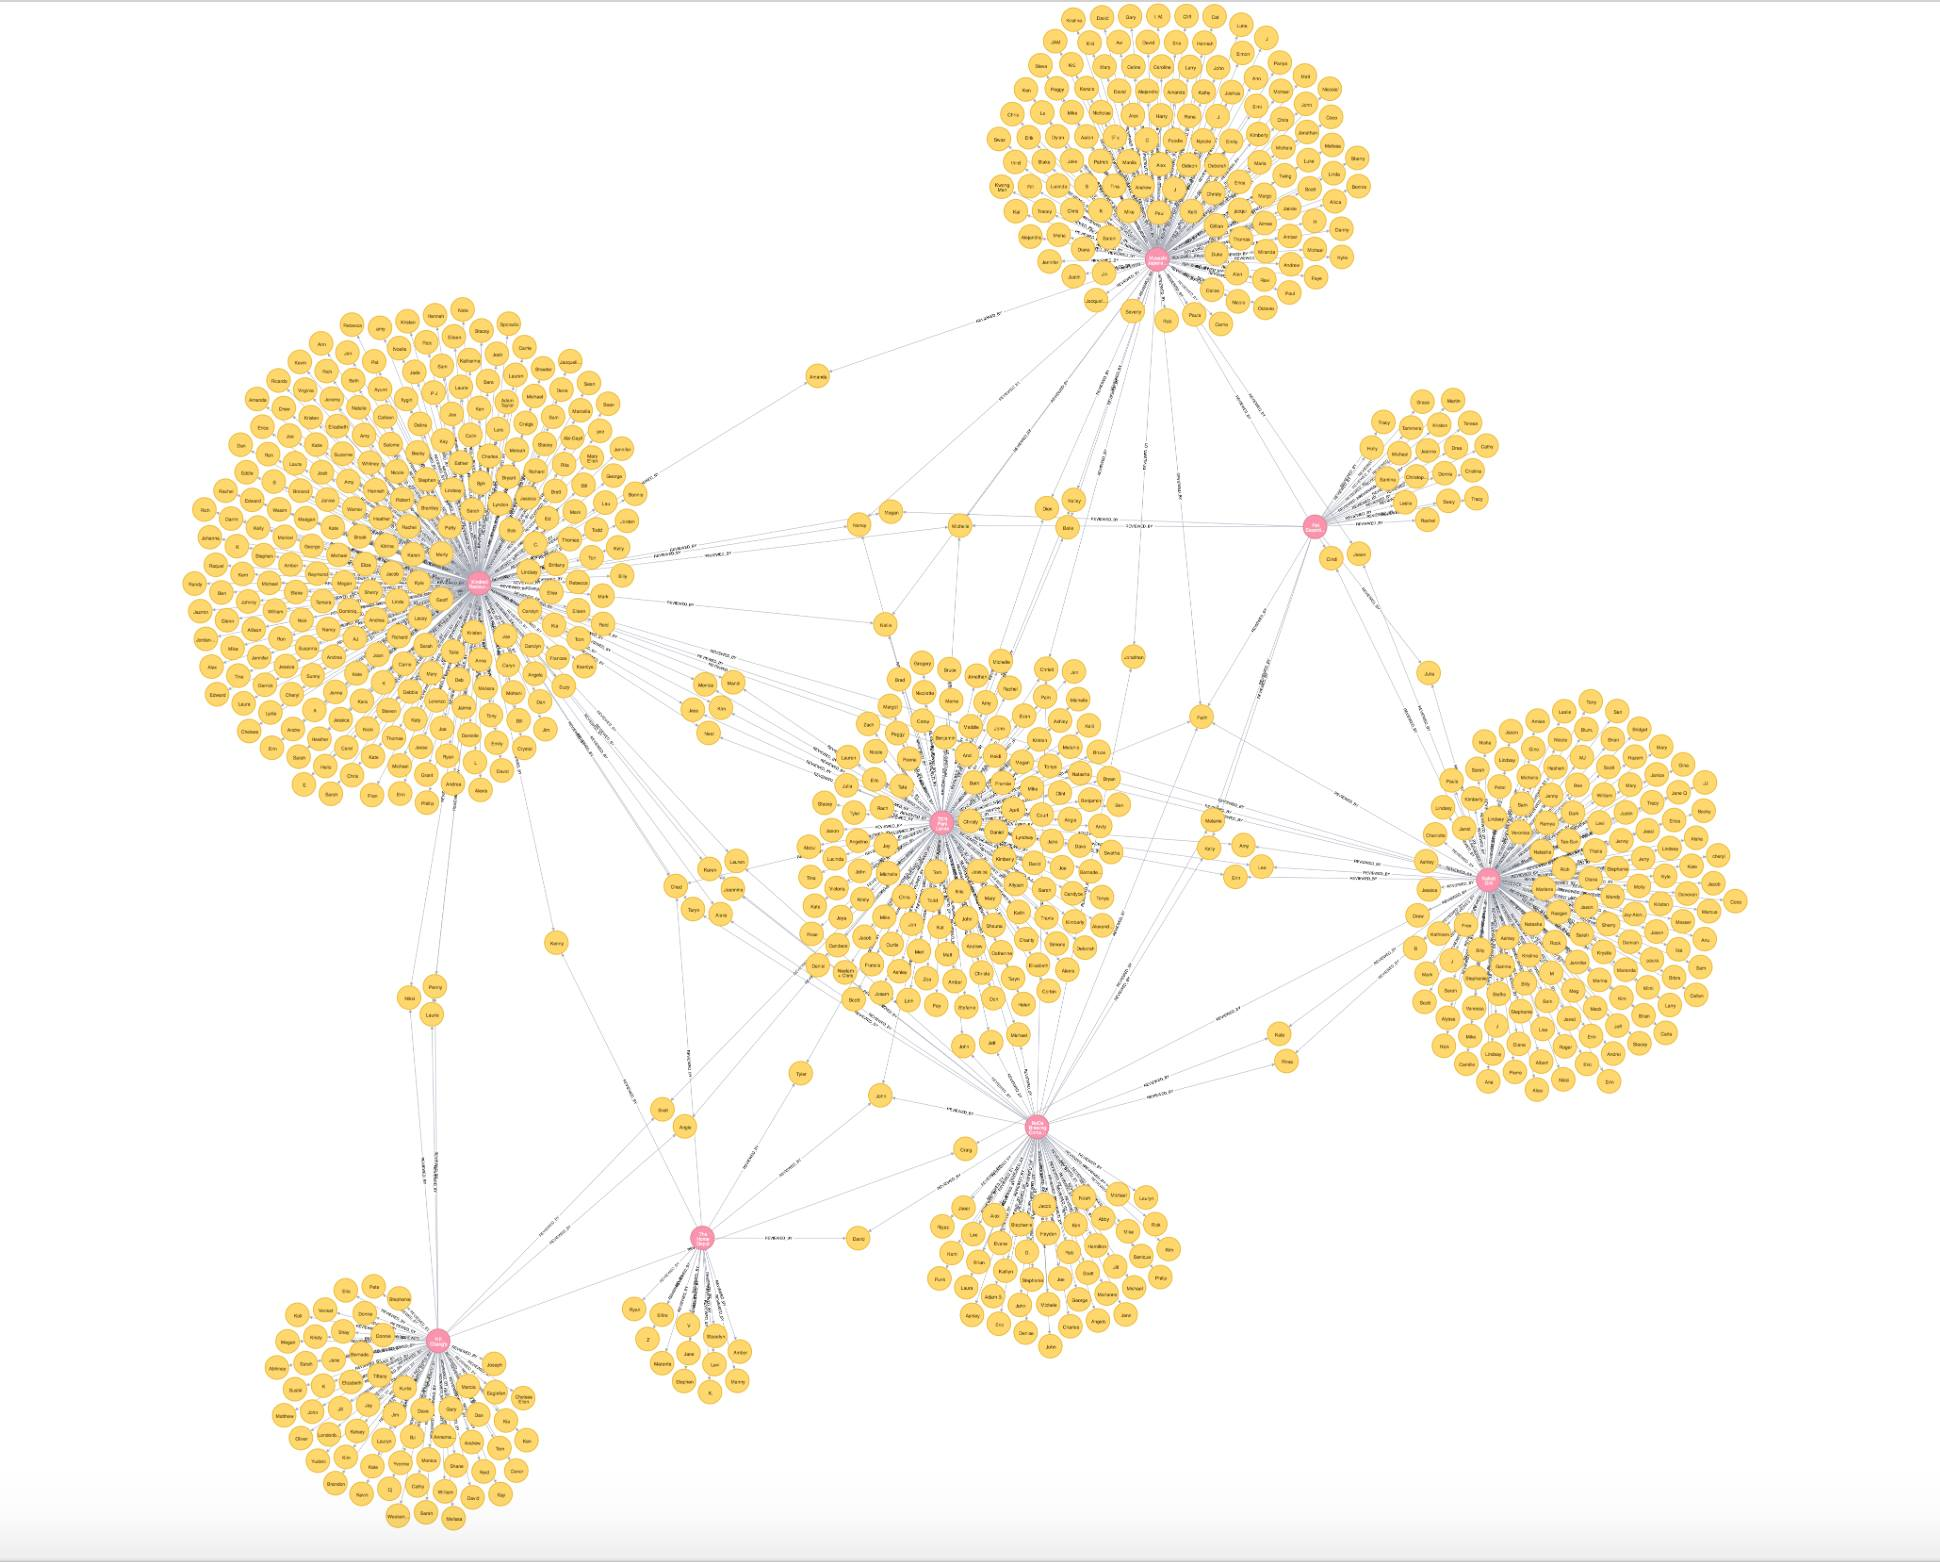

In [33]:
def Graph_Neo4j2_Business_User_Relationships():
    import pandas as pd
    import numpy as np
    from py2neo import Graph, Node, Relationship

    user = pd.read_csv('user.csv', header=0, na_filter=False)
    business = pd.read_csv('business.csv', header=0, na_filter=True)
    review = pd.read_csv('review.csv', header=0, na_filter=False)

    pd.business_x = business.latitude
    pd.business_y = business.longitude

    step = 1

    to_bin = lambda x: np.floor(x / step) * step

    business["latbin"] = business.latitude.map(to_bin)
    business["lonbin"] = business.longitude.map(to_bin)

    graph = Graph(user="neo4j", password="neo4j")
    graph = Graph("http://localhost:7474/db/data/")

    business_filt = business.loc[(business.lonbin == -81) & (business.latbin == 35)]
    review_filt = pd.merge(review, business_filt, left_on='business_id', right_on='id', how='inner')
    user_filtered = pd.merge(user, review_filt, left_on='id', right_on='user_id', how='inner')
    user_filt = user_filtered.drop_duplicates('id', keep='first')
#
def construct_nodes():
    # create nodes for each record in business 
    for n, i in enumerate(business_filt.T):
        tx = graph.begin()
        a = Node("Business", idno=business_filt.id[i], name=business_filt.name[i])
        tx.create(a)
        tx.commit()

    # create nodes for each record in users 
    for n, i in enumerate(user_filt.T):
        tx = graph.begin()
        a = Node("Users", idno=user_filt.id[i], name=user_filt.name_x[i])
        tx.create(a)
        tx.commit()

    # create edge representing "reviewed by"

    for n, m in enumerate(review_filt.T):
        a = graph.evaluate("MATCH (a:Business) WHERE a.idno={x} RETURN a", x=review_filt.business_id[m]) # find node matching user id
        b = graph.evaluate("MATCH (b:Users) WHERE b.idno={y} RETURN b", y=review_filt.user_id[m]) # find node matching friend id 
        tx = graph.begin()
        ab = Relationship(a, "REVIEWED_BY", b)
        tx.create(ab) # create relationship
        tx.commit()
#
# Figure 23 - Review graph, establishing business and user nodes combined with respective user comments (reviews)
Image(filename="dependables/Dataset Analysis/Yelp Specific/Reviewed.jpg")

Eventually, it was decided to forgo using Neo4j for graph visualizations, in favour of pure javascript built graphs, specifically D3JS. Whilst Neo4j was found to be useful for visualization of graph relationships and queries, the interface was slow when handling big data. Moreover it lacked customisation and flexibility. 

We now adopt this ability to retrieve user sentiment from respective user comments and attempt to apply it on a bigger scale. For a particular city, we establish a connected graph of businesses residing within, and users connected to varied businesses by their respective user comment. In this case we limit the generic user comment to only reviews, and utilize different coloring to establish the different sentimentatlity of the comment. Due to the sizeable amount of presented data, we restrict this graph to reviews which are considered useful (useful > 0).

The following colouring notation is used for the following d3js visualization:
 - Grey Nodes: Users
 - Green Nodes: Businesses
 - Red Edges: Negative Sentiment
 - Blue Edges: Positive Sentiment
 - Yellow Edges: Neutral Sentiment
 
``` sql
#Nodes
(select concat(
       '{"name": "',b.name,'" ,',
       '"id": "',b.id,'" ,',
       '"rvCnt": ',b.review_count,' ,',
       '"type": "','green','"}'
       )
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
join yelp_db.user u
on r.user_id = u.id
join yelp_db.category c
on b.id = c.business_id
join yelp_db.enhanced_category ec
on ec.primary_category = c.category
or ec.secondary_category = c.category
or ec.tertiary_category = c.category
where 1=1
and b.city = 'Woodmere'
and r.useful > 0
and concat(ec.primary_category, ec.secondary_category, ec.tertiary_category) like '%Food%'
group by b.id)
union
(select concat(
       '{"name": "',u.name,'" ,',
       '"id": "',u.id,'" ,',
       '"rvCnt": ',u.review_count,' ,',
       '"type": "','grey','"}'
       )
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
join yelp_db.user u
on r.user_id = u.id
join yelp_db.category c
on b.id = c.business_id
join yelp_db.enhanced_category ec
on ec.primary_category = c.category
or ec.secondary_category = c.category
or ec.tertiary_category = c.category
where 1=1
and b.city = 'Woodmere'
and r.useful > 0
and concat(ec.primary_category, ec.secondary_category, ec.tertiary_category) like '%Food%'
group by u.id);

#Links
select b.id as business_id,
       u.id as user_id,
       r.text as review_text
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
join yelp_db.user u
on r.user_id = u.id
join yelp_db.category c
on b.id = c.business_id
join yelp_db.enhanced_category ec
on ec.primary_category = c.category
or ec.secondary_category = c.category
or ec.tertiary_category = c.category
where 1=1
and b.city = 'Woodmere'
and r.useful > 0
and concat(ec.primary_category, ec.secondary_category, ec.tertiary_category) like '%Food%'
group by b.id, u.id;
```

In [34]:
# Figure 23 - Yelp Graph, Business, User Nodes, connected by respective reviews
IFrame(src='dependables/Visualizations/Yelp_graph/Graph.html', height=1000, width=1000)

In [35]:
# Figure 24 - Yelp Graph, Business, User Nodes. Reviews are displayed as well as the assigned sentiment value (dictated by the Sentiment Analyzer)
IFrame(src='dependables/Visualizations/Yelp_graph/Graph2.html', height=1000, width=1000)

### User recommendation system using Yelp Reviews
Figure 23 is useful for getting an immediate glance at which business nodes are most successful with regards to overall user sentiment. This is particularly useful to gauge the overall quality of a particular business, yet the above visualizations allow much to be desired, particularly so due to the dense nature of the graphs.

The following section attempts to utilize the Sentiment Analyzer module, combined with Yelp's business topology and user comments. We start by plotting all businesses registered under Yelp.

``` sql
select concat(
        '{"business_cnt":',count(*),', ',
        '"lat":',avg(latitude), ', ',
        '"lng":',avg(longitude), ', ' ,
        '"city": "',city, '", ',
        '"avg_stars":',avg(stars), ', ' ,
        '"min_stars":',min(stars),', ' ,
        '"max_stars":',max(stars),', ' ,
        '"review_cnt":',sum(review_count), '} '
        )
from yelp_db.business
where 1=1
and city is not null
and city <> ''
group by city;
```

In [36]:
# Figure 25 - Business distribution over Yelp cities
IFrame(src='dependables/Visualizations/Business_per_city_location/Business_per_city_location.html', height=1000, width=1000)

The business locations, in conjunction with user sentiment assigned to each business allow us to establish a recomendation rating. This is particularly useful allowing us to rank businesses depending on overall atrributed user sentiment, a much more powerful ranking metric than the default enabled star rating. We find that such a functionality can be quite useful to the user, allowing him to search for closest, highest ranking, currently open, businesses depending on a desired business category (Food, Entertainment, etc).

In order to rank businesses by overall user sentimentality, we establish a new table in the yelp dataset, called **BUSINESS_USER_SENTIMENT**. The table is a replica of the original business table, with the addition of a new column called **user_sentiment**. The user_sentiment column is used to house a scalar value, a total amount of attributed sentiment towards the respective business. The higher this value is, the higher attributed sentimentality attributed towards the business, and consequently the lower the value, the lower the attributed sentiment.

When calculating the user_sentiment for a particular business, we use the following approach to rank businesses accordingly:
 - ∞ < x < -1    : Neg
 - -1 <= x <= 1 : Neu
 - 1 < x < ∞	  : Pos

``` sql
DROP TABLE IF EXISTS business_user_sentiment;
/*
Creates a business table replica, and adds a 
new vector column to represent user sentiment, 
defaulting to 0. 

Sentiment of values are considered as follows:
1) ∞ < x < -1    : Neg
2) -1 <= x <= 1 : Neu
3) 1 < x < ∞	  : Pos
*/
CREATE TABLE `business_user_sentiment` (
  `id` varchar(22) NOT NULL,
  `name` varchar(255) DEFAULT NULL,
  `neighborhood` varchar(255) DEFAULT NULL,
  `address` varchar(255) DEFAULT NULL,
  `city` varchar(255) DEFAULT NULL,
  `state` varchar(255) DEFAULT NULL,
  `postal_code` varchar(255) DEFAULT NULL,
  `latitude` float DEFAULT NULL,
  `longitude` float DEFAULT NULL,
  `stars` float DEFAULT NULL,
  `review_count` int(11) DEFAULT NULL,
  `is_open` tinyint(4) DEFAULT NULL,
  `user_sentiment` int(11) DEFAULT 0,
  PRIMARY KEY (`id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;
```

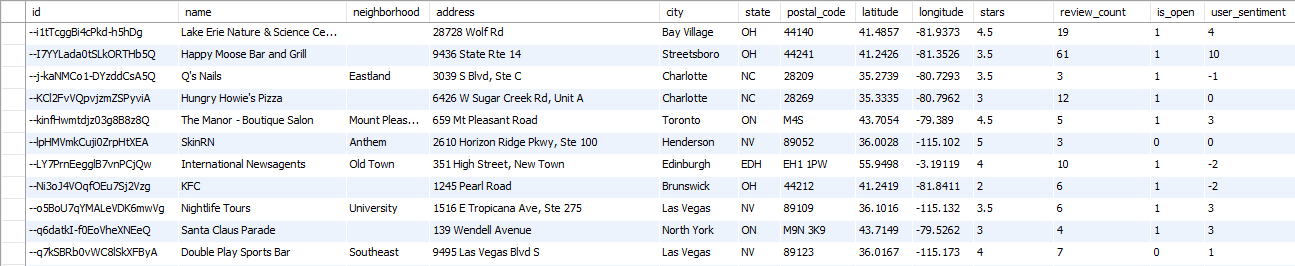

In [37]:
# Figure 26 - Screenshot of review table
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/business_user_sentiment_table.png")

Due to the sizeable amount of user comments within the Yelp dataset, we only consider user reviews which are considered useful (useful > 1). Those retrieved reviews are exposed to the Sentiment Analyzer class, and the result is saved inside of a python dictionary, containing all affected businesses and attributed sentiment value. This dictionary is eventually used to update table business_user_sentiment.

In [38]:
def populate_table_business_user_sentiment(self, state):
    """
    This method carries out sentiment analysis on user reviews per business, and calculates a sentiment value
    vector to assign to a particular business. It then goes over every business which had sentiment analysis
    performed on it and updates table BUSINESS_USER_SENTIMENT
    """
    print("Started sentiment analysis on state " + str(state))
    #
    # Establish database connection
    conn = self.db_obj.connect()
    #
    # select business_id, 
    #        text 
    # from yelp_db.review r 
    # join yelp_db.business b 
    # on b.id = r.business_id 
    # where 1=1 and r.useful > 0 
    # and b.state = 'NV';
    sql = sc.sql_REVIEW_BUSINESS_AND_TEXT(state.upper())
    #
    # Retrieve businesses
    print('Retrieving Yelp reviews...')
    review_cursor = self.db_obj.select_query(conn, sql)
    #
    # Closes database connection
    self.db_obj.close(conn)
    #
    # Iterate over retrieved records and perform sentiment analysis
    counter = 0
    review_dict = dict()
    n_step = 1000
    print('Commencing review sentiment analysis...')
    for id, text in review_cursor:
        #
        sentiment_vector = 0
        sentiment = self.sa.predict(text)
        if sentiment == 'pos':
            sentiment_vector += 1
        elif sentiment == 'neg':
            sentiment_vector -= 1
        else:
            pass # We do not update sentiment_vector for neutral reviews
        #
        if id in review_dict:
            review_dict[id] += sentiment_vector
        else:
            review_dict[id] = 0 + sentiment_vector
        #
        counter += 1
        if counter % n_step == 0:
            print('Sentiment analysis on ' + str(counter) + 'th review...')
    #
    counter = 0
    print('Commencing business updates...')
    #
    # Establish database connection
    conn = self.db_obj.connect()
    #
    for id, sentiment_vector in review_dict.items():
        #
        sql = sc.sql_UPDATE_BUSINESS(sentiment_vector, id)
        self.db_obj.execute_query(conn, sql)
        #
        counter += 1
        #
        if counter % n_step == 0:
            print(str(counter) + 'th business updated...')
    #
    # Closes database connection
    self.db_obj.close(conn)
    #
    print('Sentiment Analysis performed on ' + state + " done!!")

With the business_user_sentiment table updated, we now attempt to implement the recommendation script used to suggest suitable businesses in the vicinity. The process takes the following inputs:
 - User current coordinate (longitude,latitude), used to calculate the havarsine distance to nearest  businesses.
 - Business category required by the user. Enhanced categories from the enhanced_category table is also supported.
 - Current time of day (used to return businesses which are open at that time according to Yelp).

``` sql
DELIMITER $$
DROP FUNCTION IF EXISTS haversine$$
/*
HAVERSINE FORMULA:

Returns the distance in degrees on the Earth 
between two known points of latitude and longitude'
*/
CREATE FUNCTION haversine(
        lat1 FLOAT, lon1 FLOAT,
        lat2 FLOAT, lon2 FLOAT
     ) RETURNS FLOAT
    NO SQL DETERMINISTIC
    COMMENT 'Returns the distance in degrees on the Earth
             between two known points of latitude and longitude'
BEGIN
    RETURN DEGREES(ACOS(
              COS(RADIANS(lat1)) *
              COS(RADIANS(lat2)) *
              COS(RADIANS(lon2) - RADIANS(lon1)) +
              SIN(RADIANS(lat1)) * SIN(RADIANS(lat2))
            )) * 111.45; #We multiply by 111.45 to convert degrees to kilometres.
END$$
 
DELIMITER ;
```

```
/*
The query requires the following inputs:

1) Current Time: (Sunday|10:00)
2) User Location in latitude and longitude: (43.8409, -79.399)
3) Business Category: (Food)
4) Top N retrievals for limit stopkey (100)

The query returns top N results for closest businesses to the user,
based on the suggested business category
*/
select concat(
		   '{"id": "',b.id,'", ',
		   '"name": "',b.name,'", ',
		   '"distance": ',b.haversine_distance,', ',
		   '"latitude": ',b.latitude,', ',
		   '"longitude": ',b.longitude,', ',
		   '"address": "',b.address,'", ',
		   '"neighborhood": "',b.neighborhood,'", ',
		   '"stars": ',b.stars,', ',
		   '"reviewcount": ',b.review_count,', ',
           '"user_sentiment": ',b.user_sentiment,', ',
		   '"status": "',
           case
			 when substring(h.hours,1,POSITION('|' IN h.hours)-1) = 'Sunday'
			   and '11:00' between substring(h.hours,POSITION('|' IN h.hours) + 2, 4)
			   and substring(h.hours,POSITION('|' IN h.hours) + 7)
			 then 'Open'
			 else 'Closed'
		   end,'"} '
           )
	from
	(
		select haversine(latitude,longitude,43.8409, -79.3996) as haversine_distance,
			   id,
			   name,
			   latitude,
			   longitude,
			   address,
			   neighborhood,
			   stars,
			   review_count,
               user_sentiment
		from yelp_db.business_user_sentiment
		where 1=1
		and latitude is not null
		and longitude is not null
		and user_sentiment >= 1
	) as b
	join yelp_db.category c
	on b.id = c.business_id
	join yelp_db.enhanced_category ec
	on ec.primary_category = c.category
	or ec.secondary_category = c.category
	or ec.tertiary_category = c.category
	join yelp_db.hours h
	on b.id = h.business_id
	where 1=1
	and concat(ec.primary_category, ec.secondary_category, ec.tertiary_category) like '%Food%'
	and substring(h.hours,1,POSITION('|' IN h.hours)-1) = 'Sunday'
	group by b.id
	order by b.haversine_distance
	limit 100;
    ```

In [39]:
def get_suggested_businesses(self, business_category, location, time, N):
    """
    Creates a json file consisting of top N businesses (self.N).
    The function creates a json file based on the output of the query results

    1) Category: Defines the type of business category the user is looking for
    2) Location: Current user location, expected in the form of a [longitude,latitude]
    3) N: Total number of businesses to be returned in surrounding area
    """
    #
    # Input validation
    business_category = business_category.title()
    sentiment_threshold = 1
    #
    # Establish database connection
    conn = self.db_obj.connect()
    sql = sc.sql_BUSINESS_USER_SENTIMENT(business_category, location, sentiment_threshold, time, N)
    #
    # Retrieve businesses
    print('Retrieving businesses in near vicinity ' + str(location[0]) + ',' + str(location[1]) + '...')
    business_cursor = self.db_obj.select_query(conn, sql)
    #
    # Closes database connection
    self.db_obj.close(conn)
    #
    # Return cursor as JSON format
    self.jf.suggested_businesses_to_json(business_cursor, 'yelp.json')

Using the above query, and considering the following input parameters as our case study:
 - User position = '43.8409, -79.3996'
 - Business category = 'Food'
 - Current time of day = 'Sunday 11:00', to establish whether business is open or closed.
 - Limiting to top 100 nearest businesses
 - **Considering only businesses with a user_sentiment value greater than 1**

We achieve the following:

In [40]:
# Figure 27 - Business distribution over Yelp cities
IFrame(src='dependables/Visualizations/User_recommendation/points.html', height=1000, width=1000)

Another example, feeding the algorithm different input parameters

 - User position = '36.1116169, -115.1717475'
 - Business category = 'Entertainment'
 - Current time of day = 'Saturday 23:00', to establish whether business is open or closed.
 - Limiting to top 100 nearest businesses
 - Considering only businesses with a user_sentiment value greater than 1

In [41]:
# Figure 28 - Business distribution over Yelp cities, example 2
IFrame(src='dependables/Visualizations/User_recommendation/points2.html', height=1000, width=1000)

In [42]:
# Figure 29 - Business distribution over Yelp cities (Heatmap)
IFrame(src='dependables/Visualizations/User_recommendation/heatmap.html', height=1000, width=1000)

## User Information Retrieval and Datamining (Top 500)
In the previous sections, we have put heavy emphasis on the business to user relationship (the user comment), focussing on the types of relationships pertaining through the Yelp dataset, and how to use this information to our advantage in order to extract datamined detail with respect to this relationship. 

Therefore, the following sections will focus further on the user itself. The challenge here is to see what information can be datamined on the user comments alone, that is, what information can we deduce on the user based off what comments are submitted by him/her. A number of user features can be established by default, due to Yelp's sign-up requirements. However, certain important user features are left out. By utilising all reviews, tips and photo captions pertaining to a particular user, we attempt to discern and establish particular facts about Yelp's users, which we consider to be useful.

For this case study, the decision to limit the following techniques to the top 500 user was taken due to the sizeable amount of data available. 'Top' is referred to as those users with highest review, tip and photo submissions on Yelp combined. Therefore, by considering the top 500, we will expect to represent and visualize information for those users who use Yelp's platform the most.

``` sql
/*
Retrieves top 500 users based on highest amount
of reviews and/or tips
*/
select uni.user_id
from (
	(select count(*) as rev_count,
		   r.user_id as user_id
	from yelp_db.review r
    group by user_id)
	union
	(select count(*) as rev_count,
		   t.user_id as user_id
	from yelp_db.tip t
    group by user_id)
) uni
group by uni.user_id
order by sum(uni.rev_count) desc
limit 500;
```

In [48]:
def data_mine_top_N_users(self, N=500, top_trending_word_count=20, pos=False):
    """ Constructs 2 JSON files for the top N users, one consisting of user estimated living coordinates, and
        another with a users trace history. An additional CSV file is also constructed for the word cloud generation. """
    #
    print("Started data mining task on top " + str(N) + " users..")
    #
    # Establish database connection
    conn = self.db_obj.connect()
    #
    sql = sc.sql_RETRIEVE_TOP_N_USERS(N)
    sql_cursor = self.db_obj.select_query(conn, sql)
    print('Retrieved top ' + str(N) + ' users..')
    #
    user_datamined_data, top_N_user_words, user_history = [],[], []
    for i, tuple in enumerate(sql_cursor):
        for user_id in tuple:
            #
            print('Commencing datamining on user: ' + str(user_id))
            sql = sc.sql_USER_DATA_MINE(user_id)
            sql_cursor2 = self.db_obj.select_query(conn, sql)
            user_datamined_data.append(sql_cursor2)
            #
            # Returns top N trending words by user
            print('Retrieving top trending words..')
            top_N_user_words.append(self.get_top_N_trending_words(user_id, top_trending_word_count, pos))
            #
            print('Retrieving user history')
            sql = sc.sql_USER_HISTORY(user_id)
            sql_cursor2 = self.db_obj.select_query(conn, sql)
            user_history.append(sql_cursor2)
    #
    # Closes database connection
    self.db_obj.close(conn)
    #
    print('Data Mining Task Complete, commencing JSON serializing')
    print(top_N_user_words)
    #
    # Pass lists to be converted into JSON files
    self.jf.user_data_mined_to_json(user_datamined_data, top_N_user_words, 'user_datamined.json')
    self.jf.user_history_to_json(user_history, 'user_history.json')
    #
    print('JSON files successfully created!')
    print('Commencing write to csv (word cloud)..')
    self.cv.generate_word_graph_template(top_N_user_words, 'user_word_cloud.csv')

### User Locality
One of the most lacking data features missing in the Yelp dataset is the address of a particular user. Whilst this may be omitted due to privacy issues and/or other conerns, the benefit of knowing where your user base originates from cannot be dispelled. Therefore, in the following subsection we attempt on narrowing down and giving a fuzzy estimate of the users' respective place of habitat. The proposed system is not accurate enough to pinpoint the exact coordinates, however it is capable of obtaining a general surface area of the users' place of living. This estimate is carried out on each users' respective comments on the Yelp platform. A direct correlation lies within the the number of user comments submitted on yelp, and the precision with which we estimate the users' place of habitat. The more user reviews we are able to datamine from the Yelp platform, the more accurate our predictions are.

The calculation to estimate each user's locality is as follows. For each user, every review is considered and grouped by state. The state with the highest number of user comments is then considered. This is done to exclude visited businesses whilst abroad. An averaging on all visited businesses (reviews left at a particular business) within the highest state is taken. This average coordinate represents the user's point of habitat, always under the assumption that a particular user will most likely visit businesses around him, in his/her level of influence/surrounding area.

In addition, the users' financial status is also datamind, by calculating the star rating of every business visited in the past, and averaging the result. Depending on this averaged value, we assign a particular financial title to the user:
 - 4.0 or above = "Upper Class"
 - 3.0 or above = "Medium Class"
 - 0.0 or above = "Lower Class"

Further to the above, the users' overall estimated personality trait is calculated. This estimation is based off the highest ranked value of the useful/funny/cool data columns provided by the Yelp dataset. This allows us to roughly gauge the type of character behind a particular user. Although the fields provided are insufficient to get such detailed information on the user, it showcases the potential of data extraction if Yelp were to increase more user related fields.

``` sql
/*
Estimating the latitude / longitude of where a user lives,
based on the assumption that the highest trending state
with respect to review count is the place of habitat for
a particular user. Taking all businesses for the top
chosen state visited by the user, the longitude and
latitude coordinates are calculated as an estimate of the
user's place of habitat +/- distance error.
*/
select u.id,
	   u.name,
	   avg(latitude) as latitude,
	   avg(longitude) as longitude,
       case
           when avg(b.stars) > 4.0 then "Upper Class"
           when avg(b.stars) > 3.0 then "Medium Class"
           else "Lower Class"
		end
       financial_status,
       max(city) as city,
       case
           when u.useful > u.funny and u.useful > u.cool then "Useful"
           when u.funny > u.useful and u.funny > u.cool then "Funny"
           else "Cool"
	   end personality_trait_dubbed_by_reviewers,
       u.fans,
       u.review_count,
       u.average_stars as review_rating,
       case
	       when compliment_hot > compliment_more
             and compliment_hot > compliment_profile
             and compliment_hot > compliment_cute
             and compliment_hot > compliment_list
             and compliment_hot > compliment_note
             and compliment_hot > compliment_plain
             and compliment_hot > compliment_cool
             and compliment_hot > compliment_funny
             and compliment_hot > compliment_writer
             and compliment_hot > compliment_photos then 'Hot comments'
		   when compliment_more > compliment_hot
             and compliment_more > compliment_profile
             and compliment_more > compliment_cute
             and compliment_more > compliment_list
             and compliment_more > compliment_note
             and compliment_more > compliment_plain
             and compliment_more > compliment_cool
             and compliment_more > compliment_funny
             and compliment_more > compliment_writer
             and compliment_more > compliment_photos then 'More comments'
		   when compliment_profile > compliment_hot
             and compliment_profile > compliment_more
             and compliment_profile > compliment_cute
             and compliment_profile > compliment_list
             and compliment_profile > compliment_note
             and compliment_profile > compliment_plain
             and compliment_profile > compliment_cool
             and compliment_profile > compliment_funny
             and compliment_profile > compliment_writer
             and compliment_profile > compliment_photos then 'Profile related comments'
		   when compliment_cute > compliment_hot
             and compliment_cute > compliment_more
             and compliment_cute > compliment_profile
             and compliment_cute > compliment_list
             and compliment_cute > compliment_note
             and compliment_cute > compliment_plain
             and compliment_cute > compliment_cool
             and compliment_cute > compliment_funny
             and compliment_cute > compliment_writer
             and compliment_cute > compliment_photos then 'Cute comments'
		   when compliment_list > compliment_hot
             and compliment_list > compliment_more
             and compliment_list > compliment_profile
             and compliment_list > compliment_cute
             and compliment_list > compliment_note
             and compliment_list > compliment_plain
             and compliment_list > compliment_cool
             and compliment_list > compliment_funny
             and compliment_list > compliment_writer
             and compliment_list > compliment_photos then 'List comments'
		   when compliment_note > compliment_hot
             and compliment_note > compliment_more
             and compliment_note > compliment_profile
             and compliment_note > compliment_cute
             and compliment_note > compliment_list
             and compliment_note > compliment_plain
             and compliment_note > compliment_cool
             and compliment_note > compliment_funny
             and compliment_note > compliment_writer
             and compliment_note > compliment_photos then 'Notice comments'
		   when compliment_plain > compliment_hot
             and compliment_plain > compliment_more
             and compliment_plain > compliment_profile
             and compliment_plain > compliment_cute
             and compliment_plain > compliment_list
             and compliment_plain > compliment_note
             and compliment_plain > compliment_cool
             and compliment_plain > compliment_funny
             and compliment_plain > compliment_writer
             and compliment_plain > compliment_photos then 'Plain / Straight to the point comments'
		   when compliment_cool > compliment_hot
             and compliment_cool > compliment_more
             and compliment_cool > compliment_profile
             and compliment_cool > compliment_cute
             and compliment_cool > compliment_list
             and compliment_cool > compliment_note
             and compliment_cool > compliment_plain
             and compliment_cool > compliment_funny
             and compliment_cool > compliment_writer
             and compliment_cool > compliment_photos then 'Cool comments'
		   when compliment_funny > compliment_hot
             and compliment_funny > compliment_more
             and compliment_funny > compliment_profile
             and compliment_funny > compliment_cute
             and compliment_funny > compliment_list
             and compliment_funny > compliment_note
             and compliment_funny > compliment_plain
             and compliment_funny > compliment_cool
             and compliment_funny > compliment_writer
             and compliment_funny > compliment_photos then 'Funny comments'
		   when compliment_writer > compliment_hot
             and compliment_writer > compliment_more
             and compliment_writer > compliment_profile
             and compliment_writer > compliment_cute
             and compliment_writer > compliment_list
             and compliment_writer > compliment_note
             and compliment_writer > compliment_plain
             and compliment_writer > compliment_cool
             and compliment_writer > compliment_funny
             and compliment_writer > compliment_photos then 'Well written comments'
           else 'Photos'
		end trending_compliments
from yelp_db.review r
join yelp_db.business b
on r.business_id = b.id
join
(select id,
	   name,
	   useful,
	   funny,
       cool,
       fans,
       review_count,
       average_stars,
       compliment_hot,
       compliment_more,
       compliment_profile,
       compliment_cute,
       compliment_list,
       compliment_note,
       compliment_plain,
       compliment_cool,
       compliment_funny,
       compliment_writer,
       compliment_photos
from yelp_db.user u
where u.id = '8RcEwGrFIgkt9WQ35E6SnQ'
) u
on r.user_id = u.id
where 1=1
and r.user_id = '8RcEwGrFIgkt9WQ35E6SnQ'
and b.state = (
	SELECT  b.state
	FROM yelp_db.review r
	join yelp_db.business b
	on r.business_id = b.id
	where 1=1
	and r.user_id = '8RcEwGrFIgkt9WQ35E6SnQ'
	group by b.state
	order by count(r.text) desc
	limit 1
);
```

In [44]:
# Figure 30 - Top 500 datamined users. Bubble radius represents number of reviews.
IFrame(src='dependables/Visualizations/User_datamined/user_datamined.html', height=1000, width=1000)

### User History
Another lacking feature found within the Yelp dataset is the lack of back log history in general. The following steps attempt to establish the routine for a particular user based of reviews left on a particular business. This functionality allows us to track the movements and whereabouts of a particular user during his time enrolled with the Yelp platform, by establishing reviews left on businesses and considering them as actually places visited. In the end, we are able to establish a map of places visited over a number of users, limited to the top 500 users. Due to density of values plotted on the map, we take a case study and evaluate this on a user by user basis.

``` sql
/*
Retrieve a history of where a user has been,
through reviews and tips left by the user at
different business locations.
*/
select un.user_id,
       b.state,
       b.city,
       b.neighborhood,
       b.latitude,
       b.longitude,
       b.address,
       b.name,
       un.date
from (
     (SELECT t.user_id as user_id,
             t.business_id as business_id,
             t.text as text,
             t.date as date
    FROM yelp_db.tip t
    where user_id = '8RcEwGrFIgkt9WQ35E6SnQ')
    union
    (select r.user_id as user_id,
            r.business_id as business_id,
            r.text as text,
            r.date as date
    from yelp_db.review r
    where user_id = '8RcEwGrFIgkt9WQ35E6SnQ')) un
join yelp_db.business b
on b.id = un.business_id
order by date desc;
```

In [45]:
# Figure 31 - User history, restricted for top 10 users
IFrame(src='dependables/Visualizations/User_history/user_hist.html', height=1000, width=1000)

### Word Cloud
To wrap up this case study, we finish off by analyzing the top most / most frequent words used by the top 500 users, considering reviews and tips combined. By accumulating all top 20 words of the top 500 users together, we manage to create a neat word cloud representation of the most frequently used terms, coloured appropriately according to sentiment.

It is worth to point out, that for the word cloud generation, the Vader Sentiment Analyzer suite outperformed the Logistic Regression and Naive Bayes hand built classifier when predicting the classification of a single word rather than an entire sentece. Therefore, we defaulted to the Vader suite to calculate sentiment on the top 20 words for each of the top 500 users.

``` sql
(select text
from yelp_db.review r
where 1=1
and user_id = 'PGeiszoVusiv0wTHVdWklA')
union 
(select text
from yelp_db.tip t
where 1=1
and user_id = 'PGeiszoVusiv0wTHVdWklA');
```

In [46]:
def generate_word_graph_template(self, top_N_user_words, path):
    """ Generates word cloud json file """
    #
    review_dict = dict()
    #
    for word_sentence in top_N_user_words:
        word_list = word_sentence.split(",")
        for word in word_list:
            if word in review_dict:
                review_dict[word] += 1
            else:
                review_dict[word] = 1
    #
    csv_list = []
    for word, value in review_dict.items():
        pred = sa.predict(word)
        csv_list.append([word, pred, value])
    #
    self.save_csv_to_path(csv_list, path)
#
def save_csv_to_path(self, csv_list, path):
    """ Takes the json string and saves it to file """
    try:
        with open(path, 'w', encoding='utf-8') as f:
            for line in csv_list:
                f.write(str(line[0]) + ',' + str(line[1]) + ',' + str(line[2]))
                f.write('\n')
    except Exception as e:
        print(str(e))
#
# Figure 32 - Word Cloud
IFrame(src='dependables/Visualizations/Word_cloud/word_cloud.html', height=1000, width=1000)

##  Conclusions and Future Work
This section concludes above's carried out case study. In this report, we have focussed heavily on the user comment aspect, aiming to acquire a range of useful information based off textual reviews using the Yelp platform. The most crucial aspects which were analyzed in this report consisted off:
 - **Review Importance** - Using metrics established from the Yelp dataset itself, we explain the importance and potential of extracting datamined information from user comments.
 - **Review Sentiment Analysis** - Using our own built sentiment analyzer, we attempted to rate different businesses using people's own opinions, based off user textual comments.
 - **Recommendation System** - Using user sentiment as a form of ranking, we are able to suggest businesses ordered by user likeability, distance, current opening hours, and category.
 - **Datamining User Information** - Based of the default information provided by the Yelp platform, we attempted to discern further information concerning the user, including respective area of living, overall financial status and personality.
 - **Dataming User History** - Using different reviews attributed to different businesses over a period of time, we attempt to trace the users' wereabouts since his time registered on Yelp.
 
This particular focus on reviews used to combine and evaluate businesses and users together, leaves the case study open for further potential investigation on other criteria. A particular, more honed investigation on users and respective friends could yield interesting results, which could even help support the current sentiment analysis case study. An example of this could feature in the form of enhancing the business recommender algorithm proposed in figure 27, to allow friendship reviews to influence the overall business suggestions provided to the user in addition to the proposed criteria. Another area which could yield further information upon further testing and evaluation is the method as to which to predict user locality based of visited businesses. A proposed alternative/addition to the current solution could attempt to discern such locations by considering also tips and photo captions apart from reviews, to be able to make more accurate predictions given a better data sampling size.